# AutoScout Car Price Prediction EDA


### PART- 1 `( Data Cleaning )`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact,Dropdown,IntSlider,Output,widgets
from IPython.display import display
import re
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
%matplotlib inline
plt.rcParams["figure.figsize"]=(10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format',lambda x:'%.2f'% x)
pd.options.display.max_rows =300
pd.options.display.max_columns=100

In [2]:
df0=pd.read_json('as24_cars.zip')
df=df0.copy()

In [3]:
df.head(5)

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
df.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-"
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]"
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [5]:
df.shape

(29480, 58)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbox    

#### The Examination of Column Names and Data Types

In [7]:
sorted(df.columns)

['\nComfort & Convenience\n',
 '\nEntertainment & Media\n',
 '\nExtras\n',
 '\nSafety & Security\n',
 'Availability',
 'Available from',
 'Battery Ownership',
 'Body type',
 'CO₂-efficiency',
 'CO₂-emissions',
 'CO₂-emissions (WLTP)',
 'Colour',
 'Country version',
 'Cylinders',
 'Doors',
 'Drivetrain',
 'Electric Range (WLTP)',
 'Emission class',
 'Emissions sticker',
 'Empty weight',
 'Energy efficiency class',
 'Engine size',
 'First registration',
 'Fuel consumption',
 'Fuel consumption (WLTP)',
 'Fuel type',
 'Full service history',
 'Gearbox',
 'Gears',
 'General inspection',
 'Last service',
 'Last timing belt change',
 'Manufacturer colour',
 'Mileage',
 'Model code',
 'Non-smoker vehicle',
 'Offer number',
 'Other fuel types',
 'Paint',
 'Power',
 'Power consumption',
 'Power consumption (WLTP)',
 'Previous owner',
 'Production date',
 'Seats',
 'Taxi or rental car',
 'Type',
 'Upholstery',
 'Upholstery colour',
 'Warranty',
 'desc',
 'location',
 'make',
 'make_model',
 'mode

In [8]:
from IPython.display import clear_output
!pip -q install skimpy
clear_output

<function IPython.core.display.clear_output(wait=False)>

In [9]:
from skimpy import clean_columns
df=clean_columns(df)
df.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-"
body_type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]"
doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]"
country_version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [10]:
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_&_convenience',
       'entertainment_&_media', 'safety_&_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'el

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28630 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28630 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  object 
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  object 
 9   country_version          16889 non-null  object 
 10  offer_number             23100 non-null  object 
 11  warranty                 15784 non-null  object 
 12  mileage                  28629 non-null  object 
 13  first_registration       28628 non-null  object 
 14  gearbox                  28

In [12]:
df.shape

(29480, 58)

#### The examination of missing values

In [13]:
df.isnull().sum()

make_model                   850
short_description            850
make                         850
model                        850
location                     850
price                        850
body_type                    850
type                         850
doors                       1209
country_version            12591
offer_number                6380
warranty                   13696
mileage                      851
first_registration           852
gearbox                     1098
fuel_type                   2637
colour                      2574
paint                      14985
desc                        1433
seller                       850
seats                       3975
power                       1422
engine_size                 2253
gears                      10526
co_emissions               10886
manufacturer_colour         7693
drivetrain                 12587
cylinders                  10628
fuel_consumption            6095
comfort_&_convenience       4047
entertainm

In [14]:
df.isnull().sum()*100/df.shape[0]

make_model                 2.88
short_description          2.88
make                       2.88
model                      2.88
location                   2.88
price                      2.88
body_type                  2.88
type                       2.88
doors                      4.10
country_version           42.71
offer_number              21.64
warranty                  46.46
mileage                    2.89
first_registration         2.89
gearbox                    3.72
fuel_type                  8.95
colour                     8.73
paint                     50.83
desc                       4.86
seller                     2.88
seats                     13.48
power                      4.82
engine_size                7.64
gears                     35.71
co_emissions              36.93
manufacturer_colour       26.10
drivetrain                42.70
cylinders                 36.05
fuel_consumption          20.68
comfort_&_convenience     13.73
entertainment_&_media     19.80
safety_&

In [15]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0] 
    missing = missing.loc[lambda x: x >= limit]
    if missing.empty: 
        return "No columns have missing values that exceed the given limit."
    else:
        return missing

def show_missing_values(limit): 
    return df_nans(df, limit)

def column_nans(serial):
    return serial.isnull().sum()*100 / serial.shape[0]

In [16]:
df_nans(df,80)

last_service              93.21
other_fuel_types          92.15
power_consumption         98.25
fuel_consumption_wltp     99.66
co_emissions_wltp         99.61
available_from            98.67
taxi_or_rental_car        98.57
availability              98.98
last_timing_belt_change   98.06
electric_range_wltp       99.95
power_consumption_wltp    99.95
battery_ownership         99.98
dtype: float64

In [17]:
show_missing_values(80)

last_service              93.21
other_fuel_types          92.15
power_consumption         98.25
fuel_consumption_wltp     99.66
co_emissions_wltp         99.61
available_from            98.67
taxi_or_rental_car        98.57
availability              98.98
last_timing_belt_change   98.06
electric_range_wltp       99.95
power_consumption_wltp    99.95
battery_ownership         99.98
dtype: float64

In [18]:
interact(show_missing_values,limit=(0,100,5))

interactive(children=(IntSlider(value=50, description='limit', step=5), Output()), _dom_classes=('widget-inter…

<function __main__.show_missing_values(limit)>

In [19]:
#lets cross check one of the columns involving missing value.we can see the answer is same which i found with interact method.
column_nans(df["power_consumption_wltp"])


99.94572591587517

In [20]:
#assign the features having missing values more than 80% to an object named drop columns and drop them from the 
#dataframed
drop_columns=df_nans(df,80).index
drop_columns

Index(['last_service', 'other_fuel_types', 'power_consumption',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_ownership'],
      dtype='object')

In [21]:
display(df.shape)
df.drop(drop_columns,axis=1,inplace=True)
display(df.shape)

(29480, 58)

(29480, 46)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29480 entries, 0 to 29479
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28630 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28630 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  object 
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  object 
 9   country_version          16889 non-null  object 
 10  offer_number             23100 non-null  object 
 11  warranty                 15784 non-null  object 
 12  mileage                  28629 non-null  object 
 13  first_registration       28628 non-null  object 
 14  gearbox                  28

#### The Examination of the Duplicate Values

In [23]:
df.duplicated

<bound method DataFrame.duplicated of                    make_model  \
0         Mercedes-Benz A 160   
1       Mercedes-Benz EQE 350   
2      Mercedes-Benz A 45 AMG   
3      Mercedes-Benz A 35 AMG   
4      Mercedes-Benz A 45 AMG   
...                       ...   
29475               Volvo S40   
29476               Volvo C30   
29477               Volvo S90   
29478               Volvo S80   
29479                     NaN   

                                       short_description               make  \
0                                                    CDi  \nMercedes-Benz\n   
1                                                   350+  \nMercedes-Benz\n   
2                                       S 4Matic+ 8G-DCT  \nMercedes-Benz\n   
3                                         4Matic+ 7G-DCT  \nMercedes-Benz\n   
4                               200CDI BE Line 4M 7G-DCT  \nMercedes-Benz\n   
...                                                  ...                ...   
29475       

In [24]:
df.astype(str).duplicated(keep=False).sum()

4384

In [25]:
df[df.astype(str).duplicated(keep=False)]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,energy_efficiency_class,co_efficiency
579,Mercedes-Benz SLK 200,Kompressor Aut. Cabrio Final Edition,\nMercedes-Benz\n,"[\n, SLK 200 ,\n]","Marienborner Str. 49, 55128 Mainz, DE","€ 15,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",NaN,"[\n, Yes, \n]","39,000 km",05/2003,[\nAutomatic\n],Regular/Benzine 91,Silver,Metallic,[Zum Verkauf steht ein gepflegter Mercedes-Ben...,Dealer,"[\n, 2, \n]",[\n120 kW (163 hp)\n],"[\n1,998 cc\n]",NaN,235 g/km (comb.),Brillantsilber metallic,NaN,NaN,"[[9.6 l/100 km (comb.)], [14.4 l/100 km (city)...","[Air conditioning, Armrest, Cruise control, El...","[CD player, Radio]","[Alarm system, Central door lock, Driver-side ...","[Alloy wheels, Sport seats]",NaN,NaN,New,NaN,Yes,Euro 4,4 (Green),Black,Full leather,NaN,"[[39,000 km, 05/2003], 1]",NaN,NaN
580,Mercedes-Benz SLK 200,Kompressor Aut. Cabrio Final Edition,\nMercedes-Benz\n,"[\n, SLK 200 ,\n]","Marienborner Str. 49, 55128 Mainz, DE","€ 15,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",NaN,"[\n, Yes, \n]","39,000 km",05/2003,[\nAutomatic\n],Regular/Benzine 91,Silver,Metallic,[Zum Verkauf steht ein gepflegter Mercedes-Ben...,Dealer,"[\n, 2, \n]",[\n120 kW (163 hp)\n],"[\n1,998 cc\n]",NaN,235 g/km (comb.),Brillantsilber metallic,NaN,NaN,"[[9.6 l/100 km (comb.)], [14.4 l/100 km (city)...","[Air conditioning, Armrest, Cruise control, El...","[CD player, Radio]","[Alarm system, Central door lock, Driver-side ...","[Alloy wheels, Sport seats]",NaN,NaN,New,NaN,Yes,Euro 4,4 (Green),Black,Full leather,NaN,"[[39,000 km, 05/2003], 1]",NaN,NaN
610,Mercedes-Benz G 500,Cabrio LORINSER UMBAU/AHK/ELEKTR. SITZE,\nMercedes-Benz\n,"[\n, G 500 ,\n]","Alte Bundesstr. 45, 71332 Waiblingen, DE","€ 209,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,"[\n, 29474, \n]",NaN,"172,000 km",02/1999,[\nAutomatic\n],Regular/Benzine 91 (Particle filter),Black,Metallic,"[unfallfrei, scheckheftgepflegt, Nichtraucher,...",Dealer,"[\n, 5, \n]",[\n218 kW (296 hp)\n],"[\n4,996 cc\n]",NaN,400 g/km (comb.),Schwarz obsidianschwarz metall,"[\n, 4WD, \n]",NaN,"[[16.7 l/100 km (comb.)], [21.8 l/100 km (city...","[Air conditioning, Armrest, Cruise control, El...","[On-board computer, Radio]","[Central door lock, Driver-side airbag, Fog li...","[Alloy wheels, Trailer hitch, Tuned car]","[\n2,350 kg\n]","[\n, 0710/403, \n]",New,Yes,Yes,Euro 4,4 (Green),Black,Full leather,1999.00,"[[172,000 km, 02/1999], 2]",G,Calculated on basis of measured CO₂-emissions ...
613,Mercedes-Benz G 500,Cabrio LORINSER UMBAU/AHK/ELEKTR. SITZE,\nMercedes-Benz\n,"[\n, G 500 ,\n]","Alte Bundesstr. 45, 71332 Waiblingen, DE","€ 209,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,"[\n, 29474, \n]",NaN,"172,000 km",02/1999,[\nAutomatic\n],Regular/Benzine 91 (Particle filter),Black,Metallic,"[unfallfrei, scheckheftgepflegt, Nichtraucher,...",Dealer,"[\n, 5, \n]",[\n218 kW (296 hp)\n],"[\n4,996 cc\n]",NaN,400 g/km (comb.),Schwarz obsidianschwarz metall,"[\n, 4WD, \n]",NaN,"[[16.7 l/100 km (comb.)], [21.8 l/100 km (city...","[Air conditioning, Armrest, Cruise control, El...","[On-board computer, Radio]","[Central door lock, Driver-side airbag, Fog li...","[Alloy wheels, Trailer hitch, Tuned car]","[\n2,350 kg\n]","[\n, 0710/403, \n]",New,Yes,Yes,Euro 4,4 (Green),Black,Full leather,1999.00,"[[172,000 km, 02/1999], 2]",G,Calculated on basis of measured CO₂-emissions ...
839,Mercedes-Benz CLA 45 AMG,4M

In [26]:
df[df.astype(str).duplicated(['make_model','short_description','location'],keep=False)]['make_model'].value_counts(dropna=False)

make_model
NaN                         850
Volvo C70                   690
Volvo V40                   678
Volvo XC60                  350
Volvo V60                   308
Volvo C30                   228
Volvo V90                   208
Volvo XC90                  206
Volvo XC40                  196
Dacia Sandero               112
Nissan Qashqai              107
Volvo V90 Cross Country      88
Opel                         84
SEAT Leon                    78
Fiat Tipo                    77
Ford Mustang                 75
Fiat 500                     72
Hyundai i30                  67
Ford Focus                   64
Nissan Micra                 61
Dacia Jogger                 59
Toyota Yaris                 51
Ford Fiesta                  50
Fiat 500C                    48
Volvo V60 Cross Country      46
Peugeot 208                  43
Renault Clio                 42
Volvo V70                    42
Renault Megane               41
SEAT Ibiza                   41
Dacia Duster                 

In [27]:
#crosscheck
df[df['make_model']=='Volvo C70'].astype(str).duplicated(keep=False).value_counts(dropna=False)

True     690
False      2
Name: count, dtype: int64

In [28]:
#Let's remember our User Defined Function for first looking to the columns

def first_looking(df, col):
    print("column name  : ", col)   # Prints out related column name
    print("per_of_nulls  : ","%", round(df[col].isnull().sum()* 100 / df.shape[0], 2)) # Calculate percentage of nulls
    print("num_of_nulls : " , df[col].isnull().sum()) # Prints out the total number of Null values for related column
    print("num_of_uniques  : ",df[col].astype(str).nunique()) #Prints out the number of unique values for related column
    print("shape_of_df  :",df.shape) # Prints out the shape of data frame
    print(df[col].value_counts(dropna=False)) # Prints out the number of accurance for unique values in the related column.


##### Price(target/label column)

In [29]:
first_looking(df, "price")

column name  :  price
per_of_nulls  :  % 2.88
num_of_nulls :  850
num_of_uniques  :  5022
shape_of_df  : (29480, 46)
price
NaN           850
€ 14,990.-    222
€ 12,990.-    219
€ 16,990.-    186
€ 19,990.-    166
             ... 
€ 19,112.-      1
€ 30,465.-      1
€ 18,461.-      1
€ 22,649.-      1
€ 4,440.-       1
Name: count, Length: 5022, dtype: int64


###### Let's check if there has been any Null values in our Target/Label variable, Price? If so, isn't it strange?

In [30]:
df['price'].isnull().any()

True

In [31]:
display(df[df["price"].isnull()].sample(20))
price_nans = df["price"].isnull().sum()
print(f"Price feature/column has {price_nans} NaN values.")

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,energy_efficiency_class,co_efficiency
17874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Price feature/column has 850 NaN values.


##### Let's first extract the values needed in our analysis:

In [32]:
df["price"].astype(str).str.extract('(\d+.\d+)')

,0
0,"16,950"
1,"80,900"
2,"69,900"
3,"46,990"
4,"16,800"
...,...
29475,"5,499"
29476,"7,300"
29477,"29,900"
29478,"4,440"


In [33]:
df['price']=df['price'].astype(str).str.extract('(\d+.\d+)')
df['price']=df['price'].str.replace(",","").astype(float)
df['price']

0       16950.00
1       80900.00
2       69900.00
3       46990.00
4       16800.00
          ...   
29475    5499.00
29476    7300.00
29477   29900.00
29478    4440.00
29479        NaN
Name: price, Length: 29480, dtype: float64

In [34]:
display(df.price.isnull().sum())
display(df.shape)

850

(29480, 46)

In [35]:
df['price'].describe()

count    28630.00
mean     23470.66
std      23953.50
min        490.00
25%      11990.00
50%      17979.00
75%      27990.00
max     999999.00
Name: price, dtype: float64

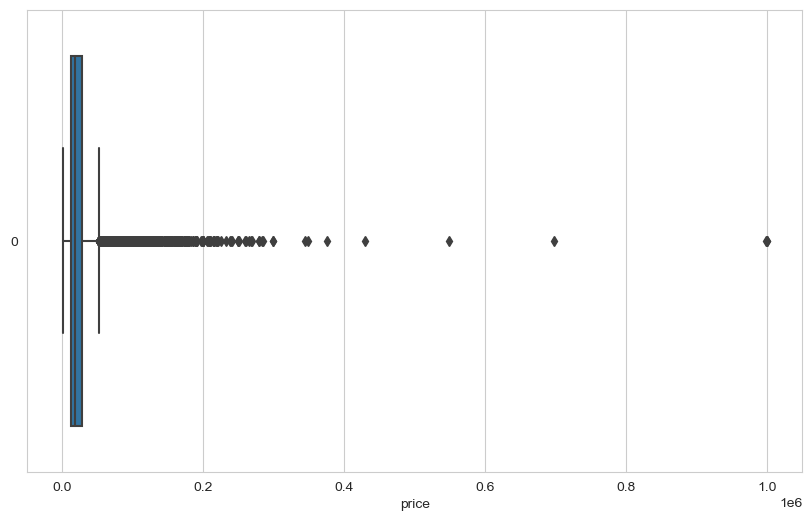

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# create box plot
sns.boxplot(df.price)

# format tick labels
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))

# display plot 
plt.show()

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

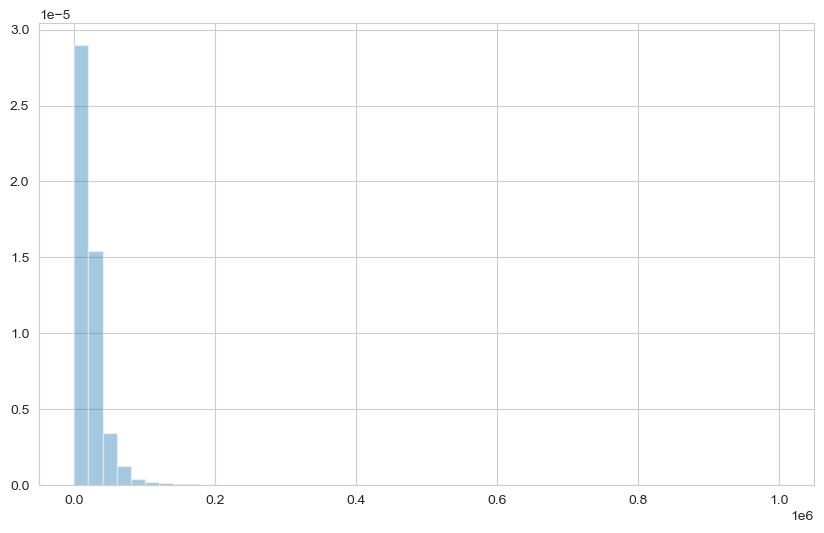

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
sns.distplot(df.price)
plt.ticklabel_format(style="plain",kde=True)

### make_model

#### Some Remarks on car make&model
Of the basic factors influencing your car value are the make and model since some vehicles are more likely to sell than others, there are some automobile models that also have a better reputation for durability and other aspects, making them ideal options for those wanting to buy a used car, for example, Japanese models tend to have a better reputation for resale than German models, but of course, it is not in all cases.

The supply and demand of some models is another factor to consider, and, for example, if there are a lot of cars of the same brand and model as yours entering the used car market, this will also affect the price due to the offer and demand.

In [ ]:
first_looking(df,"make_model")

In [ ]:
df['make']=df.make.str.strip('\n')

In [ ]:
df.make.value_counts(dropna=False)

## model

### Some Remarks on car model
##### The Importance of model in cars while buying and selling?
The model of a car is the specific version or variant of a particular make. When selling or buying a car, the model is an important consideration for several reasons:
Features and options: Different models within a make can have different standard and optional features, such as engine size, transmission type, safety features, and entertainment systems. These features can affect the car's value and desirability. Condition: The condition of a particular model can vary depending on factors such as age, mileage, and maintenance history. Some models may have

Rarity: Some models may be more rare or collectible, which can affect their value and desirability among certain buyers. 
Personal preference: Buyers may have personal preferences for certain models based on factors such as styling, performance, or reputation.
When selling a car, emphasizing the specific model can help to attract buyers who are specifically interested in that particular version or variant of the make. Similarly, when buying a car, considering the model can help to narrow down the options and find a vehicle that meets the buyer's needs and preferences.

In [ ]:
df['model']=df['model'].explode().str.strip('\n, ')
df['model']

In [ ]:
df.model.value_counts(dropna=False)

In [ ]:
#### let's check compatibility of the values in the make and model columns of the vehicles with the values in the make_model column:

In [ ]:
df[['make_model','make','model']].sample(20)

When the percentage or number of Null/Missing values are checked before it seems there has been nothing;however there has been some anomalies for model feature including some empty sells.Let's check them.

In [ ]:
display(df.loc[2967,"model"])
display(df.loc[22043,"model"])

In [ ]:
df['model'].str.contains(r'^\s*$').value_counts()

In [ ]:
# Drop rows with NaN values in the "model" column
df_cleaned = df.dropna(subset=['model'])

# Display count of rows where the "model" column contains only whitespace characters
display(df_cleaned[df_cleaned['model'].str.contains(r'^\s*$')]["model"].count())

# Display relevant rows from the DataFrame where the "model" column meets this condition
display(df_cleaned[df_cleaned['model'].str.contains(r'^\s*$')][['make_model', 'make', 'model']])


#### let's check how many unique values there have been for make_model,make and model

In [ ]:
display(df["make_model"].nunique()) #The number of unique values in "make_model"
display(df["make"].nunique()) #The number of unique values in "make"
display(df["model"].nunique()) #The number of unique values in "model"
display(df.groupby("make")['model'].nunique().to_frame())

In [ ]:
df.shape

#### After the examination,we will keep the columns of "make_model","make", and "model" and decide later

### Short_description
##### Some Remarks on short description:
In any car trade web page, the short description for a car is a brief summary or overview of the vehicle's key features and characteristics. This description typically includes information such as the make, model, year, mileage, condition, and any notable features such as trim level, engine type, transmission, and interior/exterior color.

The short description serves as a quick summary of the car's most important details, allowing potential buyers to quickly assess whether the car meets their needs and preferences. It is often displayed prominently on the webpage alongside a photo of the car, and may also include other key information such as the asking price, location of the vehicle, and the seller's contact information.

The short_description is an important component of a car listing on a trade web page, as it can help to attract potential buyers and generate interest in the vehicle. A well-crafted short_description that accurately and effectively highlights the car's key features and benefits can help to increase the likelihood of a successful sale.

In [ ]:
first_looking(df,'short_description')

In [ ]:
df.drop('short_description',axis=1,inplace=True)

In [ ]:
df.shape

In [ ]:
# df.drop("short_description",axis=1,inplace=True)

In [ ]:
df.shape

### Desc

In [ ]:
df.columns

In [ ]:
df.shape

#### location

#### Some remarks on location

#### location

In [ ]:
first_looking(df,"location")

In [ ]:
df.location

### Location feature will be kept for finding the answers of some analytical questions in this analysis for now, but  in machine learning modeling. 

##### Some Remarks on body type(class)
In any car trade we page, the vehicle class (body type) for a car describe the car's size, shape, and style. Vehicle class and body type affect resale value for multiple reasons. One critical factor is geography. Sports cars and convertibles sell better in warm climates, where they're practical throughout the year. Rugged SUVs anIfour-wheel-drive vehicles are more popular in colder climates and areas with rougher terrain.

The vehicle class typically refers to a broader category of vehicles based on their intended use and size. Common vehicle classes include subcompact cars, compact cars, midsize cars, full-size cars, SUVs, trucks, and vans. The vehicle class can provide a general indication of the car's size, features, and capabilities, and can be useful for buyers who are looking for a specific type of vehicle for a particular purpose.

Overall, both the vehicle class (body type) is important pieces of information that can help potential buyers to narrow down their options and find a vehicle that meets their needs and preferences. Car trade web pages typically provide information about the class of each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

In [ ]:
first_looking(df,"body_type")

In [ ]:
df['body_type']=df['body_type'].explode().str.strip("\n, ")
df['body_type']

In [ ]:
df['body_type'].value_counts(dropna=False)

### TYPE
#### Some Remarks on vehicle type
An ex-demo car is a ex-demonstration unit that are typically test driven by potential customers at the showroom. In the process, the car would have clocked up some mileage. An ex-demo car, depending on how you look at it, can be quite a bargain when shopping for a car. After all, on paper at least, it offers quite a lot of savings compared to a brand-new car. More than often, ex-demo cars are top-spec models as dealers want to persuade customers to get the highest variant possible. Compared to a typical used car, getting an ex-demo car is way more straightforward and transparent, but no where as hassle-free as buying new.

A company/employee car is a vehicle provided by the business for both business and private use of an employee who usually is required to travel extensively for their role, for example, a regional sales manager. Due to its nature, this kind of cars will be driven by their owners and have more mileage than others. This is probably the most important factor in a resale. Greater the mileage, more the car has been used; hence higher wear and tear and impact on the engine. A lower reading on the odometer will always command a higher price.

In [ ]:
first_looking(df,'type')

In [ ]:
df['type']=df['type'].explode().str.strip("\n, ")
df['type']

In [ ]:
df.type.value_counts(dropna=False)

### Doors
###### Some Remarks on Doors
The number of doors a car has can be an important consideration when buying or selling a vehicle, depending on the preferences and needs of the buyer or seller.

For example, a bayer who frequently travels with passengers or children may prefer a car with four or more doors for easier access and exit. On the other hand, a buyer who prioritizes sporty or sleek design may prefer a two-door coupe or convertible.

Similarly, when selling a car, the number of doors can affect the car's desirability and resale value. Some buyers may specifically be looking for a car with a certain number of doors, depending on their needs and preferences.

However, the number of doors is just one of many factors that buyers and sellers consider when evaluating a car. Other factors such as the make, model, year, mileage, condition, features, and price can also play a significant role in the buying and selling process.

Ultimately, whether the number of doors is an important factor in buying or selling a car depends on the specific needs and preferences of the buyer or seller, and should be considered in the context of other relevant factors and considerations.

In [ ]:
first_looking(df,"doors")

In [ ]:
df['doors']=df['doors'].explode().str.strip("\n, ")
df['doors']

In [ ]:
import pandas as pd
df['doors'] = df['doors'].astype(str)
df['doors'] = df['doors'].explode().str.strip("\n, ")
df['doors'] = pd.to_numeric(df['doors'], errors='coerce')
print(df['doors'])


In [ ]:
df.doors.value_counts(dropna=False)

### country_version
##### Same Remarks on country version
The country version of a car can sometimes be important in buying and selling in Europe.

Different countries may have different regulations, standards, and preferences when it comes to car design, features, and performance. For example, some countries may have stricter emissions standards or safety requirements, or may prefer cars with certain types of engines or features.

As a result, the country version of a car can affect its availability, desirability, and resale value in different European countries. A car that is popular and in high demand in one country may not be as popular or in demand in another, depending on factors such as local regulations, cultural preferences, and market conditions

In additio me country version of a car can also affect its maintenance and repair costs, as well as the availability of replacement parts and service. Some car parts may be specific to a particular country version of a car, and may be more difficult or expensive to source in other countries.

Overall, when buying or selling a car in Europe, it is important to consider the country version of the car and how it may affect its availability, desirability, and value in different markets. Car trade web pages may provide information about the country version of a car in the listing, along with other key details such as the make, model, year, mileage, and asking price.

In [38]:
first_looking(df,"country_version")

column name  :  country_version
per_of_nulls  :  % 42.71
num_of_nulls :  12591
num_of_uniques  :  26
shape_of_df  : (29480, 46)
country_version
NaN                         12591
[\n, Germany, \n]            7939
[\n, Spain, \n]              6376
[\n, Italy, \n]               679
[\n, Belgium, \n]             641
[\n, European Union, \n]      340
[\n, Netherlands, \n]         306
[\n, Austria, \n]             266
[\n, France, \n]              101
[\n, United States, \n]        57
[\n, Czechia, \n]              47
[\n, Poland, \n]               31
[\n, Hungary, \n]              21
[\n, Denmark, \n]              21
[\n, Romania, \n]              12
[\n, Japan, \n]                12
[\n, Switzerland, \n]           9
[\n, Luxembourg, \n]            9
[\n, Sweden, \n]                6
[\n, Slovenia, \n]              5
[\n, Slovakia, \n]              4
[\n, Croatia, \n]               3
[\n, Bulgaria, \n]              1
[\n, Malta, \n]                 1
[\n, Canada, \n]                1
[\n, M

In [39]:
df['country_version']=df['country_version'].explode().str.strip("\n, ")
df['country_version']

0          Spain
1          Spain
2          Spain
3          Spain
4          Spain
          ...   
29475        NaN
29476    Belgium
29477        NaN
29478        NaN
29479        NaN
Name: country_version, Length: 29480, dtype: object

In [40]:
df.country_version.value_counts(dropna=False)

country_version
NaN               12591
Germany            7939
Spain              6376
Italy               679
Belgium             641
European Union      340
Netherlands         306
Austria             266
France              101
United States        57
Czechia              47
Poland               31
Hungary              21
Denmark              21
Romania              12
Japan                12
Switzerland           9
Luxembourg            9
Sweden                6
Slovenia              5
Slovakia              4
Croatia               3
Bulgaria              1
Malta                 1
Canada                1
Mexico                1
Name: count, dtype: int64

In [41]:
df.shape

(29480, 46)

In [42]:
df.drop('country_version',axis=1, inplace=True)

In [43]:
df.shape

(29480, 45)

### offer_number
##### Same Remarks on offer_number

In [44]:
first_looking(df,"offer_number")

column name  :  offer_number
per_of_nulls  :  % 21.64
num_of_nulls :  6380
num_of_uniques  :  20946
shape_of_df  : (29480, 45)
offer_number
NaN                                6380
[\n, 1, \n]                          28
[\n, L-Vorlauf 2023, \n]             10
[\n, 30, \n]                          9
[\n, 20, \n]                          9
                                   ... 
[\n, ggp-EP-880-ZS, \n]               1
[\n, 7475319, \n]                     1
[\n, abci-EZ-260-PS_130291, \n]       1
[\n, 7407611, \n]                     1
[\n, 43-JR-LR, \n]                    1
Name: count, Length: 20946, dtype: int64


In [45]:
df['offer_number']=df['offer_number'].explode().str.strip("\n, ")
df['offer_number']

0         7468157
1         7054863
2         7410454
3         7464503
4         7127931
           ...   
29475    09-PF-XS
29476         NaN
29477        2791
29478    43-JR-LR
29479         NaN
Name: offer_number, Length: 29480, dtype: object

In [46]:
df.drop('offer_number',axis=1, inplace=True)

In [47]:
df.shape

(29480, 44)

### Warranty
#### Same Remarks on Warranty
In a car trade web page, the warranty for a car refers to a guarantee or promise provided by the seller or manufacturer that the car will function properly for a specified period of time or under certain conditions. A warranty may cover the cost of repairs or replacement parts if the car experiences certain types of mechanical or electrical problems during the warranty period.

Warranties can provide peace of mind for buyers, as they offer a degree of protection against unexpected repair costs and defects. However, the specific terms and conditions of a warranty can vary widely depending on the seller or manufacturer, and may be subject to limitations or exclusions.

Warranties may also affect the value and desirability of a car in the used car market. A car with a strong or comprehensive warranty may be more attractive to buyers and may command a higher price, while a car with no warranty or a limited warranty may be less desirable and may sell for a lower price.

When buying or selling a car on a car trade web page, it is important to carefully review the terms and conditions of any warranty offered by the seller or manufacturer, and to factor the warranty into the pricing and negotiation process if applicable.


In [48]:
first_looking(df,"warranty")

column name  :  warranty
per_of_nulls  :  % 46.46
num_of_nulls :  13696
num_of_uniques  :  66
shape_of_df  : (29480, 44)
warranty
NaN                     13696
[\n, 12 months, \n]      9545
[\n, Yes, \n]            2319
[\n, 24 months, \n]      1515
[\n, 60 months, \n]       968
[\n, 6 months, \n]        398
[\n, 36 months, \n]       257
[\n, 3 months, \n]        185
[\n, 0 months, \n]        133
[\n, 48 months, \n]        78
[\n, 84 months, \n]        47
[\n, 72 months, \n]        40
[\n, 13 months, \n]        22
[\n, 8 months, \n]         19
[\n, 18 months, \n]        15
[\n, 1 months, \n]         15
[\n, 15 months, \n]        13
[\n, 14 months, \n]        13
[\n, 16 months, \n]        13
[\n, 30 months, \n]        12
[\n, 34 months, \n]        11
[\n, 21 months, \n]        11
[\n, 33 months, \n]        11
[\n, 32 months, \n]         9
[\n, 20 months, \n]         9
[\n, 23 months, \n]         9
[\n, 19 months, \n]         9
[\n, 17 months, \n]         9
[\n, 35 months, \n]         8


In [49]:
df['warranty']=df.warranty.apply(lambda x: x[0] if type(x)==list else x)
df['warranty']=df.warranty.str.extract('(\d{1,4})').astype("float") #str.extract('(\d+)')

In [50]:
df.warranty.value_counts(dropna=False)

warranty
NaN       16015
12.00      9545
24.00      1515
60.00       968
6.00        398
36.00       257
3.00        185
0.00        133
48.00        78
84.00        47
72.00        40
13.00        22
8.00         19
18.00        15
1.00         15
15.00        13
14.00        13
16.00        13
30.00        12
34.00        11
21.00        11
33.00        11
32.00         9
20.00         9
23.00         9
19.00         9
17.00         9
35.00         8
28.00         8
50.00         6
22.00         6
42.00         5
31.00         4
26.00         4
52.00         4
47.00         4
9.00          4
25.00         3
58.00         3
11.00         3
27.00         3
45.00         2
53.00         2
10.00         2
57.00         2
51.00         2
29.00         2
2.00          2
80.00         2
90.00         2
7.00          2
46.00         1
117.00        1
43.00         1
65.00         1
39.00         1
142.00        1
110.00        1
37.00         1
49.00         1
55.00         1
99.00         1

### mileage
#### Same Remarks on Warranty
In a car trade web page, the mileage for a car refers to the total distance the vehicle has traveled since it was first manufactured. The mileage is usually measured in kilometers or miles, depending on the country and region. Actual kilometer on the cars is one of the most important factors which one may think that there is negative linear correlation between the price and the kilometers of the car.

Cars stack, on average, 10,000-15,000 kms in mileage, each year. The more miles your car has been driven, the lower its market value wil get generally, Cars with higher mileage on the odometer end to be exposed to greater wear and tear, and are more likely to require a greater focus on maintenance and repairs. Mileage is also a key ranking factor for prospective used car buyers- the general rule of thumb being that a car with lower miles is viewed more favourably by buyers.

In [51]:
first_looking(df,"mileage")

column name  :  mileage
per_of_nulls  :  % 2.89
num_of_nulls :  851
num_of_uniques  :  14184
shape_of_df  : (29480, 44)
mileage
NaN           851
10 km         586
1 km          172
50 km         133
100 km        119
             ... 
141,589 km      1
59,821 km       1
123,500 km      1
29,781 km       1
230,047 km      1
Name: count, Length: 14184, dtype: int64


In [52]:
df['mileage']=df['mileage'].explode().str.strip("\n, ")
df['mileage']

0        120,200 km
1          5,000 km
2         18,900 km
3         18,995 km
4        197,000 km
            ...    
29475    145,000 km
29476     96,000 km
29477     94,343 km
29478    230,047 km
29479           NaN
Name: mileage, Length: 29480, dtype: object

In [53]:
import pandas as pd

df['mileage'] = df['mileage'].astype(str)

df['mileage'] = df['mileage'].str.replace(',', '').str.extract(r'(\d{1,8})')

df['mileage'] = df['mileage'].astype(float)

print(df['mileage'])


0       120200.00
1         5000.00
2        18900.00
3        18995.00
4       197000.00
           ...   
29475   145000.00
29476    96000.00
29477    94343.00
29478   230047.00
29479         NaN
Name: mileage, Length: 29480, dtype: float64


In [54]:
df.mileage.value_counts(dropna=False)


mileage
NaN          851
10.00        586
1.00         172
50.00        133
100.00       119
            ... 
141589.00      1
59821.00       1
123500.00      1
29781.00       1
230047.00      1
Name: count, Length: 14184, dtype: int64

### first_registration
##### some remarks on  first_registration
In a car trade web page, the first registration date for a car refers to the date when the vehicle was first registered with the local or national authorities, and legally allowed to be driven on public roads. This date is also known as the "first registration year" or "registration date."

The first regisTation date is an important piece of information that can provide insight into the age and history of the vehicle. For example, a car that was first registered several years ago may have had multiple owners and may have higher mileage, while a car that was recently registered may be in better condition and may have lower mileage.

The first registration date can also affect the value and desirability of a car in the used car market. A car that is relatively new and has a recent first registration date may be more attractive to buyers and may command a higher price, while an older car with an earlier first registration date may be less desirable and may sell for a lower price.

When buying or selling a car on a car trade web page, it is important to carefully review the first registration date and to consider it in the context of other

factors such as the make, model, year, mileage, and condition of the vehicle.

In [55]:
first_looking(df,"first_registration")

column name  :  first_registration
per_of_nulls  :  % 2.89
num_of_nulls :  852
num_of_uniques  :  656
shape_of_df  : (29480, 44)
first_registration
NaN        852
08/2022    454
06/2022    428
05/2019    420
06/2019    418
          ... 
08/1980      1
06/1980      1
09/1970      1
06/1963      1
10/1979      1
Name: count, Length: 656, dtype: int64


In [56]:
import pandas as pd
df['first_registration'] = df['first_registration'].astype(str)
df['first_registration'].str.extract('.*(\d{4})', expand = False)


0        2016
1        2022
2        2020
3        2020
4        2015
         ... 
29475    2004
29476    2011
29477    2017
29478    2002
29479     NaN
Name: first_registration, Length: 29480, dtype: object

In [57]:
df['first_registration'].str[-4:]

0        2016
1        2022
2        2020
3        2020
4        2015
         ... 
29475    2004
29476    2011
29477    2017
29478    2002
29479     nan
Name: first_registration, Length: 29480, dtype: object

In [58]:
df['first_registration'].value_counts(dropna=False)

first_registration
nan        852
08/2022    454
06/2022    428
05/2019    420
06/2019    418
          ... 
08/1980      1
06/1980      1
09/1970      1
06/1963      1
10/1979      1
Name: count, Length: 656, dtype: int64

### production_date
##### Some Remarks on production date:

In [59]:
first_looking(df,"production_date")

column name  :  production_date
per_of_nulls  :  % 79.96
num_of_nulls :  23572
num_of_uniques  :  50
shape_of_df  : (29480, 44)
production_date
NaN        23572
2019.00     1179
2021.00      980
2022.00      894
2020.00      763
2018.00      762
2017.00      391
2016.00      239
2015.00      118
2014.00       90
2013.00       76
2010.00       53
2012.00       43
2011.00       43
2008.00       34
2009.00       26
2007.00       20
2006.00       17
2002.00       15
2004.00       13
2003.00       13
1967.00       12
2001.00       12
1966.00       11
1999.00        9
2005.00        9
1965.00        9
1970.00        9
1997.00        8
1994.00        8
1968.00        7
2000.00        7
1998.00        5
1990.00        3
1973.00        3
1987.00        3
1993.00        3
1991.00        3
1996.00        3
1995.00        2
1969.00        2
1978.00        2
1982.00        2
1961.00        1
1954.00        1
1988.00        1
1962.00        1
1981.00        1
1985.00        1
1976.00        1
Name: 

In [60]:
df[(df["first_registration"].notnull()) & \
   (df["production_date"].notnull()) & \
   (df["first_registration"] != df["production_date"])][["first_registration", "production_date"]]


,first_registration,production_date
8,06/2019,2019.00
16,03/2021,2021.00
23,01/2019,2018.00
27,03/2014,2014.00
30,07/2020,2018.00
...,...,...
29436,01/2022,2021.00
29437,04/2022,2022.00
29438,09/2021,2021.00
29447,03/2022,2022.00


The first registration and production date for a car can sometimes be different, depending on the specific circumstances of the vehicle.

In general, the production date refers to the date when the car was manufactured by the automaker, while the first registration date refers to the date when the car was first registered with the local or national authorities and legally allowed to be driven on public roads.

In some cases, there may be a delay between the production date and the first registration date, especially if the car was produced in one country and then

exported to another country for sale. For example, a car that was manufactured in Germany in 2021 may not be registered and sold in the United States until

2022, resulting in a difference between the production date and the first registration date.
Similarly, a car that has been in storage or on a dealer lot for an extended period of time may have a production date that is earlier than the first registration date. For example, a 2021 model year car that was produced in late 2020 but not registered and sold until 2021 may have different production and registration dates.



### Future engineering for "Age" column
A Why do we need a new feature named "age"?

Car age is perhaps the biggest factor in deciding the price of a second-hand car. Most probably new cars in the world lose their value fairly quickly in the initial years of usage. Unless your car is a prized vintage, you will realize that the relation between the car price and its age are inversely proportional.
Unless it is a vintage, the older the car, the lower the resale price. The reason is fairly simple-every car has a lifetime. And the closer it is to the end of its life. the lower the price.during this analysis we are Assuming the year is 2022.

In [61]:
# Extract year part from date strings
df['first_registration'] = df['first_registration'].str[-4:]

# Convert 'first_registration' column to numerical values
df['first_registration'] = pd.to_numeric(df['first_registration'], errors='coerce')

# Calculate age based on the difference between the current year (2022) and the 'first_registration' year
df['age'] = 2022 - df['first_registration']

# Display the 'age' column
print(df['age'])

0        6.00
1        0.00
2        2.00
3        2.00
4        7.00
         ... 
29475   18.00
29476   11.00
29477    5.00
29478   20.00
29479     NaN
Name: age, Length: 29480, dtype: float64


In [62]:
df.age.value_counts(dropna=False)

age
3.00       3667
4.00       3492
0.00       3086
1.00       2870
2.00       2473
5.00       2426
6.00       1486
7.00       1237
8.00        936
NaN         852
9.00        703
10.00       655
11.00       642
12.00       559
15.00       492
14.00       441
13.00       424
16.00       395
17.00       287
18.00       247
19.00       211
21.00       191
20.00       187
22.00       160
23.00       144
24.00        91
25.00        81
28.00        80
27.00        78
26.00        71
31.00        62
30.00        60
29.00        55
32.00        54
56.00        41
55.00        34
34.00        33
57.00        32
49.00        29
50.00        29
54.00        27
35.00        26
44.00        23
36.00        22
33.00        20
52.00        19
37.00        18
51.00        18
43.00        17
53.00        17
39.00        16
47.00        14
45.00        13
40.00        11
58.00        11
46.00        11
38.00        10
48.00         9
59.00         9
41.00         9
60.00         8
61.00         7
67.0

In [63]:
df.drop(["first_registration","production_date"], axis=1, inplace=True)

In [64]:
df.shape

(29480, 43)

### Gearbox

In [65]:
first_looking(df,"gearbox")

column name  :  gearbox
per_of_nulls  :  % 3.72
num_of_nulls :  1098
num_of_uniques  :  4
shape_of_df  : (29480, 43)
gearbox
[\nManual\n]            17023
[\nAutomatic\n]         11287
NaN                      1098
[\nSemi-automatic\n]       72
Name: count, dtype: int64


In [66]:
df['gearbox']=df['gearbox'].astype(str).str.strip("['\\n, \\n']").str.extract("(\D+)")
df['gearbox']

0           Manual
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
29475    Automatic
29476       Manual
29477    Automatic
29478    Automatic
29479            a
Name: gearbox, Length: 29480, dtype: object

In [67]:
df.gearbox.value_counts(dropna=False)

gearbox
Manual            17023
Automatic         11287
a                  1098
Semi-automatic       72
Name: count, dtype: int64

In [68]:
df['gearbox'].replace('a', np.nan, inplace=True)

In [69]:
df.gearbox.value_counts(dropna=False)

gearbox
Manual            17023
Automatic         11287
NaN                1098
Semi-automatic       72
Name: count, dtype: int64

### Power
##### Some Remarks on power:

In [70]:
first_looking(df,"power")

column name  :  power
per_of_nulls  :  % 4.82
num_of_nulls :  1422
num_of_uniques  :  352
shape_of_df  : (29480, 43)
power
[\n110 kW (150 hp)\n]      1992
NaN                        1422
[\n96 kW (131 hp)\n]       1356
[\n88 kW (120 hp)\n]       1182
[\n81 kW (110 hp)\n]       1166
                           ... 
[\n746 kW (1,014 hp)\n]       1
[\n570 kW (775 hp)\n]         1
[\n471 kW (640 hp)\n]         1
[\n179 kW (243 hp)\n]         1
[\n26 kW (35 hp)\n]           1
Name: count, Length: 352, dtype: int64


In [71]:
df[['power_kw','power_hp']] = df['power'].apply(lambda item: item[0] if type(item)==list else item) \
                                    .str.extract(r'\D*(?P<kw>\d+)\D+(?P<hp>\d+)').astype(float)

In [72]:
df.power_kw.value_counts(dropna=False)

power_kw
110.00    1992
NaN       1422
96.00     1356
88.00     1182
81.00     1166
          ... 
746.00       1
570.00       1
471.00       1
179.00       1
26.00        1
Name: count, Length: 352, dtype: int64

In [73]:
df.power_hp.value_counts(dropna=False)

power_hp
150.00    1992
NaN       1422
131.00    1356
120.00    1182
110.00    1166
          ... 
465.00       1
412.00       1
670.00       1
506.00       1
33.00        1
Name: count, Length: 348, dtype: int64

In [74]:
df.shape

(29480, 45)

In [75]:
df.drop('power', axis=1, inplace=True)

In [76]:
df.shape

(29480, 44)

### fuel_type
##### Some Remarks on fuel_type
Another key factor affecting used car prices is fuel economy. Efficient vehicles tend to hold their yalue better when gas prices are high, while less efficient vehicles (which typically have more cargo space and higher safety ratings) do better when gas is cheap.

In a car trade web page, the fuel type for a car refers to the type of fuel that the car's engine is designed to use. The most common fuel types used in cars are gasoline (petrol), diesel, and electric.

Gasoline-powered cars use a spark-ignition engine that runs on gasoline, while diesel-powered cars use a compression-ignition engine that runs on diesel fuel. Electric cars use an electric motor powered by a battery that is charged by plugging the car into an electrical outlet or a charging station.

The fuel type can affect the performance, efficiency, and environmental impact of a car, as well as its desirability and resale value in the used car market. For example, some buyers may prefer the efficiency and lower emissions of a diesel or electric car, while others may prefer the power and performance of a gasoline-powered car.

In [77]:
first_looking(df,"fuel_type")

column name  :  fuel_type
per_of_nulls  :  % 8.95
num_of_nulls :  2637
num_of_uniques  :  47
shape_of_df  : (29480, 44)
fuel_type
Gasoline                                                                                              8532
Diesel                                                                                                5911
Super 95                                                                                              3557
Diesel (Particle filter)                                                                              2816
NaN                                                                                                   2637
Regular/Benzine 91                                                                                    2065
Super E10 95                                                                                          1016
Regular/Benzine 91 (Particle filter)                                                                   555
Super 95 (Part

In [78]:
df["fuel_type"].str.split("/").value_counts(dropna=False)

fuel_type
[Gasoline]                                                                                                    8532
[Diesel]                                                                                                      5911
[Super 95]                                                                                                    3557
[Diesel (Particle filter)]                                                                                    2816
NaN                                                                                                           2637
[Regular, Benzine 91]                                                                                         2065
[Super E10 95]                                                                                                1016
[Regular, Benzine 91 (Particle filter)]                                                                        555
[Super 95 (Particle filter)]                                          

In [79]:
df["fuel_type"]=df["fuel_type"].str.split("/").str[0].str.strip()
df["fuel_type"]

0                          Diesel
1                        Electric
2                        Gasoline
3                        Gasoline
4                          Diesel
                   ...           
29475                    Gasoline
29476    Diesel (Particle filter)
29477                    Gasoline
29478                    Super 95
29479                         NaN
Name: fuel_type, Length: 29480, dtype: object

In [80]:
df["fuel_type"]=df["fuel_type"].str.split("(").str[0].str.strip()
df["fuel_type"]

0          Diesel
1        Electric
2        Gasoline
3        Gasoline
4          Diesel
           ...   
29475    Gasoline
29476      Diesel
29477    Gasoline
29478    Super 95
29479         NaN
Name: fuel_type, Length: 29480, dtype: object

In [81]:
df["fuel_type"].value_counts(dropna=False)

fuel_type
Gasoline                8728
Diesel                  8727
Super 95                4097
Regular                 2906
NaN                     2637
Super E10 95            1340
Others                   213
Electric                 188
Super Plus 98            185
Liquid petroleum gas     165
CNG                       95
Super Plus E10 98         77
LPG                       77
Domestic gas H            25
Domestic gas L            13
Ethanol                    3
Hydrogen                   3
Biogas                     1
Name: count, dtype: int64

In [82]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "others", "Ethanol"] 
petroleum_gas = ["Liquid petroleum gas", "CNG", "LPG", "Domestic gas H", "Domestic gas L", "Biogas", "Hydrogen"]
def fueltype(x):
    if x in benzine:
        return "Benzine" 
    elif x in petroleum_gas:
        return "Liquid/Natural Gas" 
    else:
        return x
df[ "fuel_type"]= df["fuel_type"].apply(fueltype)                                                                                                                                         

In [83]:
df[ 'fuel_type'].value_counts(dropna=False)

fuel_type
Benzine               17336
Diesel                 8727
NaN                    2637
Liquid/Natural Gas      379
Others                  213
Electric                188
Name: count, dtype: int64

### Colour
##### Some Remarks on colour
Car colour (some cars may have limited edition colours): Popular colours usually garner more attention from potential buyers and therefore are easier to sell. Some cars may come in limited edition colours, which can be difficult to sell; however, these cars usually find a higher than usual price when successfully sold.
In a car trade web page, the car colour for a car refers to the exterior colour of the vehicle. The colour of a car can vary widely, from traditional colours such as black, white, and silver to more unique and custom colours such as blue, red, green, or even multi-colored or metallic finishes.
The car colour can affect the appearance and style of a car, as well as its desirability and resale value in the used car market. For example, some buyers may
prefer classic lours such as black or white, while others may prefer more unique or bold colours that stand out on the road.

In [84]:
first_looking(df,"colour")

column name  :  colour
per_of_nulls  :  % 8.73
num_of_nulls :  2574
num_of_uniques  :  15
shape_of_df  : (29480, 44)
colour
Black     6473
Grey      5998
White     5185
Blue      3478
NaN       2574
Red       2242
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: count, dtype: int64


### manufacturer_Colour
##### Some Remarks on manufacturer_colour
When a car is produced by a manufacturer, the exterior is painted in a specific color ór colors that are part of the manufacturer's standard color palette. These colors are often referred to as the "factory" or "manufacturer" colors. The exact color options available for a particular make and model of car can vary depending on the year of production and the specific trim level or package.

In [85]:
first_looking(df,"manufacturer_colour")

column name  :  manufacturer_colour
per_of_nulls  :  % 26.1
num_of_nulls :  7693
num_of_uniques  :  4964
shape_of_df  : (29480, 44)
manufacturer_colour
NaN                               7693
Blanco                            1235
Gris                               671
Azul                               552
Negro                              546
                                  ... 
Colore esterno (snowflake whit       1
Pompeigraumetallic                   1
Cararragrau                          1
ICE WHITE (wit metallic)             1
Denim Blue metallic (blauw met       1
Name: count, Length: 4964, dtype: int64


In [86]:
# Checking compatibility of the values in the colour with the ones in the manufacturer_colour column.
df[["manufacturer_colour","colour"]].sample(20)

,manufacturer_colour,colour
746,GRIS,NaN
925,Designo selenitgrau magno,Grey
24980,Dark Knight,NaN
8800,Negro,Black
9239,Blanco,White
3968,Stahlgrau Metallic,Grey
15929,Perlmutt-schwarz,Black
21277,Blanco,White
12361,NaN,Red
26937,NaN,Blue


In [87]:
df[(df["colour"].isnull())&(df["manufacturer_colour"].notnull())][["colour","manufacturer_colour"]]

,colour,manufacturer_colour
1,NaN,Negro Obsidiana
24,NaN,GRIS GRAFITO
37,NaN,Plata Iridio
145,NaN,Gris Montagne
169,NaN,Bleu denim métallisé
...,...,...
29434,NaN,Blanc Cristal
29439,NaN,Gris Osmium
29440,NaN,Noir Onyx Métallisé
29441,NaN,Gris Osmium


In [88]:
df.shape

(29480, 44)

In [89]:
df.drop(["colour","manufacturer_colour"],axis=1,inplace=True)

In [90]:
df.shape

(29480, 42)

### paint
##### some Remarks on paint
Solid paint finishes are typically a single, uniform color and have no added metallic or pearlescent flakes. Metallic paint finishes contain small metallic flakes that reflect light and can create a shimmering effect in sunlight. Pearl paint finishes contain a combination of pigments and reflective flakes that create a unique, multi-dimensional effect.
In a car trade web page, the car paint type refers to the type of paint finish used on the exterior of the vehicle. The most common types of paint finishes used on cars are solid, metallic, and pearl.
while satin finishes have a slight sheen but are not as reflective as gloss finishes.
Other types of paint finishes that may be listed on a car trade web page include matte, satin, and gloss. Matte finishes have a flat, non-reflective appearance.
The type of paint finish can affect the appearance and durability of the paint, as well as the desirability and resale value of the car. For example, some buyers may prefer the unique and eye-catching appearance of a metallic or pearl paint finish, while others may prefer the classic and understated look of a solid color

In [91]:
first_looking(df,"paint")

column name  :  paint
per_of_nulls  :  % 50.83
num_of_nulls :  14985
num_of_uniques  :  3
shape_of_df  : (29480, 42)
paint
NaN          14985
Metallic     14494
Uni/basic        1
Name: count, dtype: int64


In [92]:
df["paint"]=df["paint"].replace(np.nan,"Uni/basic",regex=True)
df["paint"]

0         Metallic
1        Uni/basic
2        Uni/basic
3        Uni/basic
4         Metallic
           ...    
29475    Uni/basic
29476     Metallic
29477     Metallic
29478    Uni/basic
29479    Uni/basic
Name: paint, Length: 29480, dtype: object

In [93]:
df[ 'paint'].value_counts(dropna=False)

paint
Uni/basic    14986
Metallic     14494
Name: count, dtype: int64

In [94]:
df.shape

(29480, 42)

In [95]:
df.drop("paint",axis=1,inplace=True)

In [96]:
df.shape

(29480, 41)

### Seller
##### Some Remarks on seller
In a car trade web page, the seller for a car refers to the person or entity that is offering the car for sale. The seller could be an individual, a dealership, or a private seller.

When buying or selling a car on a car trade web page, it is important to carefully review the seller and to consider it in the context of other factors such as the make, model, year, mileage, and condition of the vehicle. Different types of sellers may have different motivations, pricing strategies, and levels of transparency when it comes to selling a car.

For example, a dealership may have a larger selection of cars to choose from and may offer financing options or warranties, but the prices may be higher to account for overhead costs and profits. A private seller may be more flexible on price and may provide more detailed information about the vehicle's history and condition, but there may be less recourse if something goes wrong with the transaction.

In [97]:
first_looking(df,"seller")

column name  :  seller
per_of_nulls  :  % 2.88
num_of_nulls :  850
num_of_uniques  :  3
shape_of_df  : (29480, 41)
seller
Dealer            26318
Private seller     2312
NaN                 850
Name: count, dtype: int64


### Seats
##### Some Remarks on seats:
In a car trade web page, the seat number for a car refers to the number of seats that the vehicle has. This includes both the driver's seat and passenger seats.

The seat number can vary depending on the make and model of the car, as well as the specific trim level or package. For example, some cars may have two seats, such as a sports car or a convertible, while others may have five or more seats, such as a minivan or SUV.

The seat number can be an important factor to consider when buying or selling a car, as it can impact the car's functionality and comfort depending on the needs of the driver and passengers. For example, a car with a larger number of seats may be more suitable for families or groups, while a car with fewer seats may be more suitable for individuals or couples.

In [98]:
first_looking(df, "seats")

column name  :  seats
per_of_nulls  :  % 13.48
num_of_nulls :  3975
num_of_uniques  :  12
shape_of_df  : (29480, 41)
seats
[\n, 5, \n]     18308
[\n, 4, \n]      5390
NaN              3975
[\n, 2, \n]      1186
[\n, 7, \n]       488
[\n, 8, \n]        43
[\n, 9, \n]        35
[\n, 3, \n]        25
[\n, 6, \n]        12
[\n, 0, \n]         9
[\n, 1, \n]         7
[\n, 17, \n]        2
Name: count, dtype: int64


In [99]:
df["seats"] = df.seats.apply(lambda x : x[0] if type(x)==list else x)

df["seats"] = df.seats.str.extract('(\d{1,4})').astype("float") # str.extract('(\d+)')
df["seats"]

0        NaN
1       5.00
2       5.00
3       5.00
4       5.00
        ... 
29475   5.00
29476   4.00
29477   5.00
29478   5.00
29479    NaN
Name: seats, Length: 29480, dtype: float64

## engine_size

### 📝 Some Remarks on engine_size:

In a car trade web page, the engine size for a car refers to the volume of the engine's combustion chambers, which is typically measured in liters (L) or cubic centimeters (cc). The engine size is also known as the engine displacement.

The engine size can vary widely depending on the make and model of the car, as well as the specific trim level or package. A larger engine size generally indicates a more powerful engine that can generate more horsepower and torque, but it may also result in lower fuel efficiency and higher emissions.

When buying or selling a car on a car trade web page, it is important to carefully review the engine size and to consider it in the context of other factors such as the make, model, year, mileage, and condition of the vehicle. Car trade web pages typically provide information about the engine size for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

🔔 Does the engine capacity affect the price of a vehicle❓

 - A larger engine tends to be more expensive for the manufacturer to build. This cost is usually recovered (plus a nice profit) by increasing the price toward the customer.
 - Many cars will have more equipment standard with the larger engine, equipment that would be chargeable extras when the car is ordered with a smaller engine. The cost of this equipment is added to the base price of the car.
Direct taxation on engine displacement in some places. Some countries or states will calculate taxes directly on the displacement. Even with power, emissions and such identical between a large and a small engine, obsolete and nonsensical rules dictate more tax to be paid on the big one.
 - Indirect taxation on typical side effects of larger engines. Back in the day, a large engine would be more powerful than a small engine, so a tax on horsepower would hit a large engine harder than a small one. Of course, with turbocharging becoming common, a small engine with a turbocharger often has more horsepower than a large engine without a turbocharger, and thus the stronger, smaller engine would be taxed more. These days, emissions-based taxes are more popular, and larger engines tend to have more emissions than smaller engines, triggering higher taxes on the larger engines.

In [100]:
first_looking(df, "engine_size")

column name  :  engine_size
per_of_nulls  :  % 7.64
num_of_nulls :  2253
num_of_uniques  :  468
shape_of_df  : (29480, 41)
engine_size
NaN               2253
[\n1,598 cc\n]    2099
[\n999 cc\n]      2068
[\n1,969 cc\n]    1929
[\n1,461 cc\n]    1110
                  ... 
[\n2,753 cc\n]       1
[\n2,495 cc\n]       1
[\n200 cc\n]         1
[\n3,224 cc\n]       1
[\n2,473 cc\n]       1
Name: count, Length: 468, dtype: int64


In [101]:
df['engine_size'] = df['engine_size'].astype(str).str.strip("['\\n, cc\\n']").replace({"a", np.nan})
df['engine_size'] = df['engine_size'].str.replace(',', '').str.extract('(\d+)').astype("float")
df['engine_size']

0           NaN
1          1.00
2       1991.00
3       1991.00
4       2143.00
          ...  
29475   2435.00
29476   1560.00
29477   1969.00
29478   2922.00
29479       NaN
Name: engine_size, Length: 29480, dtype: float64

In [102]:
df['engine_size'].value_counts(dropna=False)

engine_size
NaN        2253
1598.00    2099
999.00     2068
1969.00    1929
1461.00    1110
           ... 
2753.00       1
2495.00       1
200.00        1
3224.00       1
2473.00       1
Name: count, Length: 468, dtype: int64

# gears

### Some Remarks on gears:

In a car trade web page, the gears for a car refer to the number of forward gears in the car's transmission. The transmission is responsible for transmitting power from the engine to the wheels, and the number of gears can have a significant impact on the car's performance, fuel efficiency, and driving experience.

Cars can have different types of transmissions, including manual and automatic transmissions. Manual transmissions require the driver to manually shift gears using a clutch and a gearstick, while automatic transmissions shift gears automatically without the need for manual intervention.

The number of gears in a car can vary depending on the make and model of the car, as well as the specific trim level or package. Cars with more gears typically offer better fuel efficiency and smoother acceleration, as the engine can operate more efficiently at different speeds.

In [103]:
first_looking(df, "gears")

column name  :  gears
per_of_nulls  :  % 35.71
num_of_nulls :  10526
num_of_uniques  :  12
shape_of_df  : (29480, 41)
gears
NaN         10526
[\n6\n]      8412
[\n5\n]      5335
[\n7\n]      1738
[\n8\n]      1690
[\n1\n]       712
[\n9\n]       642
[\n4\n]       256
[\n10\n]      112
[\n0\n]        31
[\n3\n]        24
[\n2\n]         2
Name: count, dtype: int64


In [104]:
df['gears'] = df['gears'].astype(str).str.extract('(\d+)').astype("float")
df['gears']

0        NaN
1       9.00
2       8.00
3       7.00
4       7.00
        ... 
29475   5.00
29476   6.00
29477   8.00
29478    NaN
29479    NaN
Name: gears, Length: 29480, dtype: float64

In [105]:
df["gears"].value_counts(dropna=False)

gears
NaN      10526
6.00      8412
5.00      5335
7.00      1738
8.00      1690
1.00       712
9.00       642
4.00       256
10.00      112
0.00        31
3.00        24
2.00         2
Name: count, dtype: int64

## co_emissions

### Some Remarks on CO emissions:

CO emissions, or carbon monoxide emissions, refer to the amount of carbon monoxide that a car's engine emits during operation. Carbon monoxide is a colorless and odorless gas that is produced by the incomplete combustion of fossil fuels, such as gasoline or diesel.

Carbon monoxide emissions can be harmful to human health, as they can reduce the amount of oxygen that the body can absorb, leading to symptoms such as headaches, dizziness, and nausea. Carbon monoxide emissions also contribute to air pollution and can have a negative impact on the environment.

In a car trade web page, information about CO emissions may be provided to help buyers and sellers understand the environmental impact of the vehicle. The CO emissions for a car can vary depending on the make and model of the car, as well as the age and condition of the vehicle.

In [106]:
first_looking(df, "co_emissions")

column name  :  co_emissions
per_of_nulls  :  % 36.93
num_of_nulls :  10886
num_of_uniques  :  348
shape_of_df  : (29480, 41)
co_emissions
NaN                  10886
0 g/km (comb.)        1038
119 g/km (comb.)       393
124 g/km (comb.)       340
129 g/km (comb.)       319
                     ...  
7 g/km (comb.)           1
80 g/km (comb.)          1
196  g/km (comb.)        1
100  g/km (comb.)        1
53 g/km (comb.)          1
Name: count, Length: 348, dtype: int64


In [107]:
df["co_emissions"] = df["co_emissions"].astype(str).str.extract('(\d+)').astype("float")
df["co_emissions"]

0          NaN
1         0.00
2          NaN
3          NaN
4          NaN
         ...  
29475   217.00
29476    99.00
29477   149.00
29478   251.00
29479      NaN
Name: co_emissions, Length: 29480, dtype: float64

### drivetrain

##### Some Remarks on drivetrain:

A car’s drivetrain includes all of the components necessary to transfer the engine’s energy to its wheels in order to make your vehicle move. A car’s drivetrain connects the engine to the wheels enabling the vehicle to move. As the engine runs, the drivetrain helps send power through the transmission to the drive wheels. The drive wheels can be either the front wheels, rear wheels, or all the wheels — also known as front-wheel, rear-wheel, and all-wheel drive.

An Automotive Drivetrain is a combination of various components that provide power to the vehicle's wheel. It is made up of a driveshaft, transmission or gearbox, universal joints, constant velocity joints, wheels, and axles. It allows the driver to control the power flow and multiplies the engine torque for controlling the engine speed.

Nowadays, the introduction of stringent emission regulations in European and North American countries has boosted demand for improved Automotive drivetrains that are lightweight and hence assist in increasing fuel efficiency, reducing emissions, and improving vehicle performance.

In [108]:
first_looking(df, "drivetrain")

column name  :  drivetrain
per_of_nulls  :  % 42.7
num_of_nulls :  12587
num_of_uniques  :  4
shape_of_df  : (29480, 41)
drivetrain
NaN                12587
[\n, Front, \n]    12066
[\n, 4WD, \n]       3252
[\n, Rear, \n]      1575
Name: count, dtype: int64


In [109]:
df["drivetrain"] = df["drivetrain"].explode().str.strip("\n, ")
df["drivetrain"]

0          NaN
1          NaN
2          4WD
3          4WD
4          4WD
         ...  
29475    Front
29476    Front
29477      NaN
29478    Front
29479      NaN
Name: drivetrain, Length: 29480, dtype: object

In [110]:
df["drivetrain"].value_counts(dropna=False)

drivetrain
NaN      12587
Front    12066
4WD       3252
Rear      1575
Name: count, dtype: int64

### cylinders

##### Some Remarks on cylinders:

In a car trade web page, the cylinders for a car refer to the number of cylinders in the car's engine. The cylinders are the part of the engine where combustion occurs, and the number of cylinders can have a significant impact on the car's performance, power, and fuel efficiency.

Cars can have different numbers of cylinders, including four-cylinder, six-cylinder, and eight-cylinder engines. Cars with more cylinders typically offer more power and performance, but may also be less fuel-efficient than cars with fewer cylinders.

When buying or selling a car on a car trade web page, it is important to carefully review the number of cylinders and to consider it in the context of other factors such as the make, model, year, mileage, and condition of the vehicle. Car trade web pages typically provide information about the number of cylinders for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

It is important to note that the number of cylinders is not the only factor that determines a car's performance and fuel efficiency. Other factors such as the engine size, transmission, and drivetrain can also play a significant role in how the car performs on the road.

In [111]:
first_looking(df, "cylinders")

column name  :  cylinders
per_of_nulls  :  % 36.05
num_of_nulls :  10628
num_of_uniques  :  13
shape_of_df  : (29480, 41)
cylinders
[\n4\n]     13068
NaN         10628
[\n3\n]      3258
[\n6\n]      1013
[\n5\n]       799
[\n8\n]       539
[\n2\n]       103
[\n0\n]        35
[\n1\n]        21
[\n12\n]        8
[\n7\n]         6
[\n26\n]        1
[\n16\n]        1
Name: count, dtype: int64


In [112]:
df["cylinders"] = df["cylinders"].astype(str).str.extract('(\d+)').astype("float")
df["cylinders"]

0        NaN
1        NaN
2       4.00
3       4.00
4       4.00
        ... 
29475   5.00
29476   4.00
29477   4.00
29478   6.00
29479    NaN
Name: cylinders, Length: 29480, dtype: float64

In [113]:
df["cylinders"].value_counts(dropna=False)

cylinders
4.00     13068
NaN      10628
3.00      3258
6.00      1013
5.00       799
8.00       539
2.00       103
0.00        35
1.00        21
12.00        8
7.00         6
26.00        1
16.00        1
Name: count, dtype: int64

### fuel_consumption

###### Some Remarks on fuel consumption:

Another key factor is fuel economy. Efficient vehicles tend to hold their value better when gas prices are high, while less efficient vehicles (which typically have more cargo space and higher safety ratings) do better when gas is cheap.

The fuel consumption for a car in a car trade web page typically refers to the amount of fuel that the car consumes per unit of distance traveled, usually expressed in miles per gallon (mpg) or liters per 100 kilometers (L/100 km). Fuel consumption is a key factor to consider when buying or selling a car, as it can have a significant impact on the car's operating costs and environmental impact.

The fuel consumption of a car can vary depending on a number of factors, including the make and model of the car, the engine size, the number of cylinders, the transmission type, and the driving conditions. Cars with smaller engines and fewer cylinders typically offer better fuel efficiency than cars with larger engines and more cylinders.

In a car trade web page, information about fuel consumption may be provided to help buyers and sellers understand the expected fuel costs associated with the vehicle. Car trade web pages typically provide information about the fuel consumption for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

It is important to keep in mind that actual fuel consumption may vary depending on a number of factors, including driving habits, road conditions, and maintenance practices. Therefore, the fuel consumption listed on a car trade web page should be used as a general guide rather than an exact estimate of the vehicle's fuel efficiency.

In [114]:
first_looking(df, "fuel_consumption")

column name  :  fuel_consumption
per_of_nulls  :  % 20.68
num_of_nulls :  6095
num_of_uniques  :  3453
shape_of_df  : (29480, 41)
fuel_consumption
NaN                                                                            6095
[[0 l/100 km (comb.)]]                                                          330
[[0 l/100 km (comb.)], [0 l/100 km (city)], [0 l/100 km (country)]]             306
[[3.4 l/100 km (comb.)], [3.7 l/100 km (city)], [3.2 l/100 km (country)]]       170
[[4 l/100 km (comb.)]]                                                          149
                                                                               ... 
[[14.2 l/100 km (comb.)], [21.3 l/100 km (city)], [10 l/100 km (country)]]        1
[[3.5 l/100 km (comb.)], [4.4 l/100 km (city)], [2.9 l/100 km (country)]]         1
[[4.5 l/100 km (comb.)], [6.2 l/100 km (city)], [3.5 l/100 km (country)]]         1
[[4.9 l/100 km (comb.)], [99.9 l/100 km (city)], [98 l/100 km (country)]]         1
[[10.4 l/100 

In [115]:
df["fuel_consumption"].iloc[2]

[['8.4 l/100 km (comb.)'],
 ['10.9 l/100 km (city)'],
 ['5.8 l/100 km (country)']]

In [116]:
df["fuel_consumption"][2][0]

['8.4 l/100 km (comb.)']

In [117]:
df["fuel_consumption"][2][1]

['10.9 l/100 km (city)']

In [118]:
['5.8 l/100 km (country)']

['5.8 l/100 km (country)']

In [119]:
def cons_avg(x):
    
    if type(x)==list:
        if x[0] != []: return x[0][0]
        else: return None
  
    else:
        return None

In [120]:
def cons_city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    else:
        return None

In [121]:
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    else:
        return None

In [122]:
df['cons_avg'] = df["fuel_consumption"].apply(cons_avg).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")
df['cons_avg'] 

0         NaN
1         NaN
2        8.40
3        7.30
4        4.90
         ... 
29475    9.10
29476    3.80
29477    6.50
29478   10.40
29479     NaN
Name: cons_avg, Length: 29480, dtype: float64

In [123]:
df['cons_city'] =  df["fuel_consumption"].apply(cons_city).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") 
df['cons_city']  

0         NaN
1         NaN
2       10.90
3        9.30
4        5.70
         ... 
29475   13.20
29476    4.30
29477    8.60
29478   15.30
29479     NaN
Name: cons_city, Length: 29480, dtype: float64

In [124]:
df['cons_country'] = df["fuel_consumption"].apply(cons_country).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") 
df['cons_country']   

0        NaN
1        NaN
2       5.80
3       6.10
4       4.40
        ... 
29475   6.70
29476   3.50
29477   5.30
29478   7.60
29479    NaN
Name: cons_country, Length: 29480, dtype: float64

In [125]:
df['cons_avg'].value_counts(dropna=False)

cons_avg
NaN      6095
5.00      831
4.90      812
4.50      690
0.00      652
5.10      647
4.70      618
5.40      609
4.80      609
5.60      594
4.30      564
5.30      558
5.20      552
4.60      550
4.20      539
4.10      518
3.80      516
5.70      504
5.50      503
5.90      498
4.00      484
4.40      442
6.40      438
6.00      430
6.30      414
5.80      399
3.70      360
3.90      353
3.60      327
7.00      312
3.40      296
6.50      292
6.10      282
6.20      278
6.60      274
6.90      270
7.40      265
7.10      253
6.70      251
6.80      226
7.30      220
7.20      202
8.40      194
8.00      194
7.60      181
3.50      180
8.20      166
7.70      165
7.80      165
7.50      156
12.00     110
3.30      109
9.00      107
9.20      103
12.50     102
8.60       95
9.80       93
8.90       92
8.30       88
3.00       84
7.90       83
9.60       79
8.70       79
1.70       77
9.50       77
1.50       73
9.40       72
9.70       69
8.80       69
8.50       67
10.10      

In [126]:
df['cons_country'].value_counts(dropna=False)

cons_country
NaN      9380
4.30      884
4.00      804
4.20      750
4.70      730
5.00      725
3.60      679
4.60      668
4.90      663
3.80      660
4.50      659
3.90      640
4.10      632
5.10      598
4.40      587
3.70      520
5.70      474
4.80      460
5.40      445
5.20      443
5.30      413
5.60      394
5.50      383
0.00      379
5.80      376
3.40      341
3.20      334
3.30      327
3.50      304
5.90      301
6.50      289
6.20      261
6.00      242
6.70      239
6.10      229
7.00      205
6.40      202
6.30      199
3.00      163
6.90      150
6.80      139
3.10      136
7.40      113
8.70      108
6.60      108
7.80      105
8.10       98
7.60       98
7.10       98
7.70       94
9.10       84
7.30       78
8.30       77
7.20       77
8.00       77
8.50       75
8.20       69
8.80       65
2.90       62
7.90       62
9.30       53
9.60       44
7.50       42
8.90       36
9.00       34
8.40       33
9.80       25
8.60       22
9.20       22
9.50       20
11.00  

In [127]:
df.shape

(29480, 44)

In [128]:
df.drop("fuel_consumption", axis=1, inplace=True)

In [129]:
df.shape

(29480, 43)

## empty_weight

### 📝 Some Remarks on empty weight:

The empty weight for a car in a car trade web page refers to the weight of the vehicle without any passengers or cargo. It is also known as the curb weight or unladen weight of the vehicle.

The empty weight of a car can vary depending on the make and model of the car, as well as the specific trim level or package. The empty weight can have a significant impact on the car's performance, fuel efficiency, and handling, as a heavier car may require more power to accelerate and may be less fuel-efficient.

In a car trade web page, information about the empty weight may be provided to help buyers and sellers understand the overall size and weight of the vehicle. Car trade web pages typically provide information about the empty weight for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

It is important to keep in mind that the empty weight listed on a car trade web page may not include optional equipment or accessories that can add weight to the vehicle. Therefore, the empty weight should be used as a general guide rather than an exact measurement of the vehicle's weight.

In [130]:
first_looking(df, "empty_weight")

column name  :  empty_weight
per_of_nulls  :  % 39.76
num_of_nulls :  11722
num_of_uniques  :  1219
shape_of_df  : (29480, 43)
empty_weight
NaN               11722
[\n1,395 kg\n]      233
[\n1,055 kg\n]      224
[\n1,423 kg\n]      216
[\n1,165 kg\n]      200
                  ...  
[\n1,877 kg\n]        1
[\n1,011 kg\n]        1
[\n1,069 kg\n]        1
[\n983 kg\n]          1
[\n1,391 kg\n]        1
Name: count, Length: 1219, dtype: int64


In [131]:
df['empty_weight'].astype(str).str.replace(',', '').str.extract('(\d+)').astype("float")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,1545.00
...,...
29475,1357.00
29476,1356.00
29477,1617.00
29478,1573.00


In [132]:
df['empty_weight'] = df['empty_weight'].astype(str).str.replace(',', '').str.extract('(\d+)').astype("float")
df['empty_weight']

0           NaN
1           NaN
2           NaN
3           NaN
4       1545.00
          ...  
29475   1357.00
29476   1356.00
29477   1617.00
29478   1573.00
29479       NaN
Name: empty_weight, Length: 29480, dtype: float64

In [133]:
df['empty_weight'].value_counts(dropna=False)

empty_weight
NaN        11722
1395.00      233
1055.00      224
1423.00      216
1165.00      200
           ...  
1877.00        1
1011.00        1
1069.00        1
983.00         1
1391.00        1
Name: count, Length: 1219, dtype: int64

### model_code

##### Some Remarks on model code:

The model code for a car in a car trade web page is a unique alphanumeric code that is assigned to a specific make and model of a car by the manufacturer. The model code is used to identify the specific configuration of the car, including its trim level, engine type, transmission, and other features.

The model code can be useful for buyers and sellers to identify the exact specifications of a particular car, especially if there are multiple variations of the same make and model. By using the model code, buyers and sellers can ensure that they are comparing apples to apples when evaluating different cars.

#### What is Model Code and Chassis Number (VIN Code)?

The model code is to identify the manufacturer, car name, body shape, engine type, and displacement, etc.! At first glance, the model code looks like a series of letters and numbers.

Car parts are different from one car to another, even for the ones with the same model and manufacture/registration year. To identify the right parts for your car, we need the "Model Code" and the "Chassis Number" that are written on the ID plate of the vehicle. Model Code (or Number) for each models.
And it is same for each models. Chassis Number (or VIN Code) is provided for each vehicles but it is different from each other even with the same model.

In [134]:
first_looking(df, "model_code")

column name  :  model_code
per_of_nulls  :  % 71.62
num_of_nulls :  21113
num_of_uniques  :  2187
shape_of_df  : (29480, 43)
model_code
NaN                   21113
[\n, 8212/AFJ, \n]       75
[\n, 1727/AAM, \n]       64
[\n, 1349/AGI, \n]       61
[\n, 1889/ABU, \n]       55
                      ...  
[\n, 7593/ANL, \n]        1
[\n, 1727/ABC, \n]        1
[\n, 4136/AEC, \n]        1
[\n, 4136/668, \n]        1
[\n, 9101/449, \n]        1
Name: count, Length: 2187, dtype: int64


In [135]:
df.drop("model_code", axis=1, inplace=True)

In [136]:
df.shape

(29480, 42)

### general_inspection

##### Some Remarks on general inspection:

A general inspection due date for a car in a car trade web page refers to the estimated date when the vehicle will be due for its next general inspection. The due date for a general inspection can vary depending on the make and model of the car, as well as the specific requirements of the local jurisdiction or regulatory body.

The general inspection due date can be useful for buyers and sellers to understand the ongoing maintenance needs of the vehicle, as well as to estimate the potential costs associated with maintaining the vehicle over time. Car trade web pages may provide information about the general inspection due date for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

It is important to note that the general inspection due date may not necessarily reflect the current condition of the vehicle, especially if the car has been driven extensively or has undergone significant wear and tear since the last inspection. Therefore, it is recommended that buyers have a more detailed inspection performed by a qualified technician or mechanic before making a purchase, especially for used cars. Additionally, it is important to check the specific requirements and regulations for general inspections in the local jurisdiction where the vehicle will be registered and driven.

In [137]:
first_looking(df, "general_inspection")

column name  :  general_inspection
per_of_nulls  :  % 58.43
num_of_nulls :  17226
num_of_uniques  :  92
shape_of_df  : (29480, 42)
general_inspection
NaN        17226
New         5883
05/2023      286
08/2023      280
03/2023      268
06/2023      266
04/2023      262
09/2023      255
07/2023      254
06/2024      216
05/2024      212
01/2023      210
02/2023      209
03/2024      207
07/2024      203
08/2024      187
09/2024      182
11/2023      176
01/2024      164
02/2024      163
04/2024      162
12/2023      160
12/2022      159
10/2023      155
06/2025      147
11/2022      131
08/2025      122
07/2025      110
09/2022       96
03/2025       95
05/2025       93
10/2022       90
04/2025       89
01/2025       75
02/2025       66
09/2025       65
10/2024       64
08/2022       64
12/2024       61
11/2024       50
06/2022       42
07/2022       41
04/2022       34
03/2022       25
05/2022       22
10/2021       17
11/2021       11
01/2022       10
07/2021       10
09/2021        8


In [138]:
df.drop("general_inspection", axis=1, inplace=True)

### full_service_history

##### Some Remarks on car service history: 

A full service history for a car in a car trade web page refers to a detailed record of all the maintenance and repair work that has been performed on the vehicle throughout its history. The service history may include information about routine maintenance tasks, such as oil changes, tune-ups, and tire rotations, as well as more significant repairs, such as engine rebuilds or transmission replacements.

Having a full service history can be useful for buyers and sellers to understand the ongoing maintenance needs of the vehicle, as well as to identify any potential issues or problems that may need to be addressed. Car trade web pages may provide information about the full service history for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

A full service history can also be an important factor in determining the value of a used car, as it can provide evidence of how well the vehicle has been maintained over time. Cars with a full service history may be more desirable to buyers, as they may be viewed as more reliable and less likely to have hidden issues or problems.

By keeping and maintaining your car service logbook, your car’s value will gain a boost. The logbook shows all the fixes and updates your car has gone through, which allows the buyer to have confidence in what he or she is getting.

In [139]:
df["full_service_history"].replace(np.nan, "No", inplace=True)

In [140]:
df["full_service_history"].value_counts(dropna=False)

full_service_history
No     16915
Yes    12565
Name: count, dtype: int64

### non_smoker_vehicle

##### Some Remarks on non-smoker vehicle: 

A non-smoker vehicle for a car in a car trade web page refers to a vehicle that has not been regularly used by a smoker or exposed to cigarette smoke. This means that the interior of the car has not been affected by tobacco smoke or the residue left behind by smoking.

A non-smoker vehicle may be important to some buyers who are sensitive to cigarette smoke or who prefer a vehicle that has not been exposed to smoking. Car trade web pages may provide information about whether a vehicle is a non-smoker vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

In [141]:
first_looking(df, "non_smoker_vehicle")

column name  :  non_smoker_vehicle
per_of_nulls  :  % 60.67
num_of_nulls :  17886
num_of_uniques  :  2
shape_of_df  : (29480, 41)
non_smoker_vehicle
NaN    17886
Yes    11594
Name: count, dtype: int64


In [142]:
df["non_smoker_vehicle"].replace(np.nan, "No", inplace=True)

In [143]:
df["non_smoker_vehicle"].value_counts(dropna=False)

non_smoker_vehicle
No     17886
Yes    11594
Name: count, dtype: int64

In [144]:
df.shape

(29480, 41)

In [145]:
df.drop("non_smoker_vehicle", axis=1, inplace=True)

### emission_class

##### Some Remarks on emission class: 

The emission class in Europe for a car in a car trade web page refers to the level of exhaust emissions that the vehicle is certified to meet according to European Union (EU) regulations. The EU has established a series of emission standards known as the Euro emissions standards, which set limits on the amount of pollutants that can be emitted from a vehicle's exhaust system.

The Euro emissions standards are organized into different classes, with each class representing a different level of emissions control. The higher the emission class, the more stringent the emissions requirements and the lower the allowable emissions levels.

Although emissions regulations date back to 1970, the first EU-wide standard – known as Euro 1 – wasn’t introduced until 1992, which saw catalytic converters became compulsory on new cars, effectively standardising fuel injection. 

Since then, there have been a series of Euro emissions standards, leading to the current Euro 6, introduced in September 2014 for new type approvals and rolled out for the majority of vehicle sales and registrations in September 2015. Euro 6 applies to all new cars registered from 1 September 2015.

**🧐 [Euro 1 to Euro 6 guide](https://www.rac.co.uk/drive/advice/emissions/euro-emissions-standards/)**

**🧐 [Euro 1 to Euro 6: how clean is my car?](https://www.whatcar.com/advice/owning/euro-1-to-euro-6-how-clean-is-my-car/n1190)**

In [146]:
first_looking(df, "emission_class")

column name  :  emission_class
per_of_nulls  :  % 39.42
num_of_nulls :  11621
num_of_uniques  :  10
shape_of_df  : (29480, 40)
emission_class
NaN             11621
Euro 6           6418
Euro 6d-TEMP     3399
Euro 6d          2858
Euro 5           2389
Euro 4           1743
Euro 3            523
Euro 2            217
Euro 1            172
Euro 6c           140
Name: count, dtype: int64


In [147]:
Euro_6 = ["Euro 6", "Euro 6d-TEMP", "Euro 6d", "Euro 6c"]

def emissionclass(x):
    if x in Euro_6:
        return "Euro 6"
    else:
        return x

df["emission_class"] = df["emission_class"].apply(emissionclass)

In [148]:
df["emission_class"].value_counts(dropna=False)

emission_class
Euro 6    12815
NaN       11621
Euro 5     2389
Euro 4     1743
Euro 3      523
Euro 2      217
Euro 1      172
Name: count, dtype: int64

In [149]:
df.drop("emission_class", axis=1, inplace=True)

In [150]:
df.shape

(29480, 39)

### emissions_sticker

##### Some Remarks on emission sticker: 

An emission sticker in Germany for a car in a car trade web page refers to a colored sticker that is affixed to the windshield of a vehicle to indicate its level of emissions. The sticker system was introduced in Germany to help regulate access to certain environmental zones in urban areas, which are designed to restrict access to high-polluting vehicles in order to improve air quality.

The emission sticker system is based on the Euro emissions standards, with vehicles meeting higher standards being eligible for a higher level of sticker. The highest level of sticker, known as a green sticker, is reserved for vehicles with the lowest emissions, while vehicles with higher emissions may receive a yellow or red sticker.

Since 2008, German cities can legally designate low-emission zones that only motorized vehicles with an emissions sticker are allowed to enter. This sticker is called Umweltplakette or Feinstaubplakette in German. Older and polluting vehicles are not eligible for emissions stickers and are as a result barred from entering low-emission zones.

The German emissions sticker comes in three colors: red, yellow and green. The red sticker is for the most polluting vehicles, the yellow sticker for slightly less polluting vehicles and and the green sticker for the least polluting vehicles.

<img src=https://i.ibb.co/6JdPwc7/Colors-German-Emissions-Sticker.png width="400" height="100">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:100%; text-align:center; border-radius:10px 10px;">Colors German Emissions Sticker</p>

As of 2021, vehicles with a red emissions sticker are no longer allowed to enter any low-emission zones in Germany. Red stickers are therefore no longer for sale. Vehicles with a yellow sticker are only allowed to enter the low-emission zone of Neu-Ulm in Bavaria. Unless you plan to visit Neu-Ulm, obtaining a yellow sticker is not very useful.

Vehicles with a green sticker on the other hand, can enter all low-emission zones in Germany. This green emissions sticker is the one you should obtain if you intend to visit German cities with a low-emission zone.

In [151]:
first_looking(df, "emissions_sticker")

column name  :  emissions_sticker
per_of_nulls  :  % 68.07
num_of_nulls :  20066
num_of_uniques  :  5
shape_of_df  : (29480, 39)
emissions_sticker
NaN               20066
4 (Green)          9230
1 (No sticker)      176
3 (Yellow)            6
2 (Red)               2
Name: count, dtype: int64


In [152]:
df["emissions_sticker"] = df["emissions_sticker"].astype(str).str.extract(r"([a-zA-Z]+)")

In [153]:
df["emissions_sticker"].value_counts(dropna=False)

emissions_sticker
nan       20066
Green      9230
No          176
Yellow        6
Red           2
Name: count, dtype: int64

In [154]:
df.shape    

(29480, 39)

In [155]:
df.drop("emissions_sticker", axis=1, inplace=True)


In [156]:
df.shape

(29480, 38)

### upholstery_colour

##### Some Remarks on upholstery colour: 

The upholstery color for a car in a car trade web page refers to the color of the seats and interior trim of the vehicle. Upholstery color can be an important factor for buyers who are looking to personalize the look and feel of their vehicle, or who may prefer certain colors for aesthetic or practical reasons.

##### Some Remarks on color conceptualization: 

**Primary Colors:** Red, yellow and blue<br>
In traditional color theory (used in paint and pigments), primary colors are the 3 pigment colors that cannot be mixed or formed by any combination of other colors. All other colors are derived from these 3 hues. 

**Secondary Colors:** Green, orange and purple<br>
These are the colors formed by mixing the primary colors.

**Tertiary Colors:** Yellow-orange, red-orange, red-purple, blue-purple, blue-green & yellow-green<br>
These are the colors formed by mixing a primary and a secondary color. That's why the hue is a two word name, such as blue-green, red-violet, and yellow-orange.

<img src=https://i.ibb.co/N38yg7r/Basic-Color-Theory.png width="400" height="100">

In [157]:
first_looking(df, "upholstery_colour")

column name  :  upholstery_colour
per_of_nulls  :  % 50.58
num_of_nulls :  14911
num_of_uniques  :  12
shape_of_df  : (29480, 38)
upholstery_colour
NaN       14911
Black     10416
Grey       2038
Other      1003
Beige       466
Brown       275
Red         159
White        93
Blue         82
Orange       23
Green         8
Yellow        6
Name: count, dtype: int64


In [158]:
Ordinary = ["Black", "White"]
Primary = ["Red", "Yellow", "Blue"]
Secondary = ["Green", "Orange"]
Tertiary_Intermediate = ["Brown", "Grey", "Beige"]

def coloridentifier(x):
    if x in Ordinary:
        return "Ordinary"
    if x in Primary:
        return "Primary"
    if x in Secondary:
        return "Secondary"
    if x in Tertiary_Intermediate:
        return "Tertiary"    
    else:
        return x

df["upholstery_colour"] = df["upholstery_colour"].apply(coloridentifier)

In [159]:
df["upholstery_colour"].value_counts(dropna=False)

upholstery_colour
NaN          14911
Ordinary     10509
Tertiary      2779
Other         1003
Primary        247
Secondary       31
Name: count, dtype: int64

In [160]:
df.shape

(29480, 38)

In [161]:
df.drop("upholstery_colour", axis=1, inplace=True)

In [163]:
df.shape

(29480, 37)

### upholstery
###### Some Remarks on upholstery:
The upholstery for a car in a car trade web page refers to the materials used to cover the seats and other interior surfaces of the vehicle. The upholstery can be made from a variety of materials, including cloth, leather, vinyl, or synthetic materials, and it can be available in a range of colors and patterns.

The upholstery of a car can be an important factor for buyers who are looking for a specific level of comfort, durability, or style. In a car trade web page, information about the upholstery may be provided to help buyers and sellers understand the overall quality and condition of the vehicle's interior.

Car trade web pages may provide information about the upholstery for each vehicle in the listing, including the type of material used, the color, and any special features or options. It is important to note that the upholstery may vary depending on the specific trim level or package of the vehicle, as well as the region or market where the car is sold.

In [165]:
first_looking(df, "upholstery")

column name  :  upholstery
per_of_nulls  :  % 36.87
num_of_nulls :  10870
num_of_uniques  :  7
shape_of_df  : (29480, 37)
upholstery
NaN             10870
Cloth            8736
Full leather     5439
Part leather     2835
alcantara         764
Other             628
Velour            208
Name: count, dtype: int64


## previous_owner

### Some Remarks on previous owner:

The previous_owner for a car in a car trade web page refers to the number of individuals or entities who have owned the vehicle before the current seller. The number of previous owners can be an important factor for buyers who are looking for a vehicle with a known history and may provide insight into how well the vehicle has been maintained and cared for over time.

In a car trade web page, information about the previous owners may be provided to help buyers and sellers understand the ownership history of the vehicle. Car trade web pages may provide information about the number of previous owners for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

It is important to note that the number of previous owners may not necessarily reflect the current condition of the vehicle, and it is still important to inspect the vehicle carefully and perform a thorough test drive before making a purchase, especially for used cars.

Additionally, it is important to verify the ownership history of the vehicle through official documents, such as the vehicle title or registration, and to be wary of any vehicles with a suspicious or unclear ownership history.

A first resale will get a better price compared to a second or third resale.  Company owned cars often fetch a lower price as multiple employees and chauffeurs may have handled the car, leading to an undesirable level of maintenance.

In [166]:
first_looking(df, "previous_owner")

column name  :  previous_owner
per_of_nulls  :  % 52.46
num_of_nulls :  15465
num_of_uniques  :  11734
shape_of_df  : (29480, 37)
previous_owner
NaN                           15465
[[50 km, 06/2022], 1]            64
[[10 km, 08/2022], 1]            59
[[10 km, 07/2022], 1]            45
[[10 km, 09/2022], 1]            38
                              ...  
[[358,000 km, 10/2010], 2]        1
[[165,400 km, 09/2010], 1]        1
[[65,000 km, 10/2006], 1]         1
[[71,000 km, 04/2013], 1]         1
[[230,047 km, 07/2002], 5]        1
Name: count, Length: 11734, dtype: int64


In [167]:
df["previous_owner"] = df["previous_owner"].str[1]
df["previous_owner"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
29475    NaN
29476      1
29477    NaN
29478      5
29479    NaN
Name: previous_owner, Length: 29480, dtype: object

In [168]:
df["previous_owner"].value_counts(dropna=False)

previous_owner
NaN    15465
1       9746
2       3221
3        699
4        184
5         69
6         37
7         22
8         16
9         14
12         3
10         2
14         1
13         1
Name: count, dtype: int64

## energy_efficiency_class

### 📝 Some Remarks on energy efficiency class about vehicles in Europe:

The energy efficiency class in Europe for a car in a car trade web page refers to the level of energy efficiency that the vehicle is certified to meet according to European Union (EU) regulations. The EU has established a series of energy efficiency classes known as CO2 emissions classes, which set limits on the amount of carbon dioxide that can be emitted from a vehicle's exhaust system.

The CO2 emissions classes are organized into different levels, with each class representing a different level of energy efficiency. The higher the energy efficiency class, the lower the CO2 emissions and the more environmentally friendly the vehicle is considered to be.

In a car trade web page, the energy efficiency class may be provided to help buyers and sellers understand the environmental impact of the vehicle, as well as to identify whether the vehicle is compliant with local energy efficiency regulations. Car trade web pages may provide information about the energy efficiency class for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

It is important to note that energy efficiency standards and classes may vary depending on the region or country where the car is sold, and different regions may have different regulations or requirements for energy efficiency. Therefore, it is recommended that buyers research the specific energy efficiency standards and regulations in their local jurisdiction before making a purchase.

The Ordinance on Energy Consumption Labelling for Passenger Cars (in German), which entered into force on 1 December 2011 (Federal Law Gazette I p.1756), requires cars to be equipped with a label (in German) informing consumers about a vehicle’s CO2 efficiency. The label not only indicates the vehicle’s energy consumption in absolute terms, but also provides information about its CO2 efficiency compared with other vehicles by ranking it on a colour-coded scale. CO2 efficiency is calculated using CO2 emissions and vehicle mass. The scale ranges from 'A+' (very efficient) to 'G' (rather inefficient).

The label also allows for information about electricity consumption to be included so as to take account of developments in the area of electric mobility.

<img src=https://i.ibb.co/vkSz5nj/Automotive-Energy-Efficiency.png width="400" height="100">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:100%; text-align:center; border-radius:10px 10px;">Efficiency Labels in German Automotives</p>

**🧐 [Energy consumption labelling for passenger cars](https://www.bmwk.de/Redaktion/EN/Artikel/Energy/fuel-efficiency-labelling-for-passenger-cars.html)**

In [169]:
first_looking(df, "energy_efficiency_class")

column name  :  energy_efficiency_class
per_of_nulls  :  % 73.53
num_of_nulls :  21676
num_of_uniques  :  11
shape_of_df  : (29480, 37)
energy_efficiency_class
NaN     21676
B        2090
A        1687
C        1133
A+       1089
D         636
A+++      375
G         309
E         271
F         147
A++        67
Name: count, dtype: int64


In [172]:
efficient = ["A", "A+", "A++", "A+++", "B"]
unefficient = ["C", "D", "E", "F", "G"]

def energyefficiency(x):
    if x in efficient:
        return "efficient"
    elif x in unefficient:
        return "unefficient"
    else:
        return x
df["energy_efficiency_class"] = df["energy_efficiency_class"].apply(energyefficiency)

In [173]:
df["energy_efficiency_class"].value_counts(dropna=False)

energy_efficiency_class
NaN            21676
efficient       5308
unefficient     2496
Name: count, dtype: int64

### co_efficiency
##### Some Remarks on CO efficiency:
CO2 emissions is a measure of the amount of carbon dioxide that is emitted by a vehicle's exhaust system. CO2 emissions are an important factor in understanding the environmental impact of a vehicle, as high levels of CO2 emissions are associated with increased greenhouse gas emissions and climate change.

In Europe, CO2 emissions from cars are regulated by the European Union (EU), which has established a series of CO2 emissions standards known as the Euro emissions standards. These standards set limits on the amount of CO2 that can be emitted from a vehicle's exhaust system, based on the vehicle's weight and other factors.

In a car trade web page, information about the CO2 emissions may be provided to help buyers and sellers understand the environmental impact of the vehicle, as well as to identify whether the vehicle is compliant with local emissions regulations. Car trade web pages may provide information about the CO2 emissions for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

It is important to note that CO2 emissions may vary depending on the specific model and engine of the vehicle, as well as the driving conditions and other factors. Therefore, it is recommended that buyers research the specific CO2 emissions of the vehicle they are interested in and consider the environmental impact of their purchase before making a decision.

In [174]:
first_looking(df, "co_efficiency")

column name  :  co_efficiency
per_of_nulls  :  % 73.53
num_of_nulls :  21676
num_of_uniques  :  2
shape_of_df  : (29480, 37)
co_efficiency
NaN                                                                                           21676
Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.     7804
Name: count, dtype: int64


In [175]:
df.drop("co_efficiency", axis=1, inplace=True)

In [176]:
df.shape

(29480, 36)

## comfort_&_convenience

### 📝 Some Remarks on car exterior/interior features:

Comfort and convenience for a car in a car trade web page refers to the features and amenities of the vehicle that are designed to enhance the comfort, convenience, and overall driving experience for the driver and passengers.

Comfort and convenience features can vary widely depending on the make, model, and trim level of the vehicle, but may include things like:

  - Power windows and door locks
  - Heated and/or ventilated seats
  - Automatic climate control
  - Keyless entry and ignition
  - Adaptive cruise control
  - Blind spot monitoring
  - Rearview camera
  - Navigation system
  - Infotainment system
  - Bluetooth connectivity
  - USB ports and other charging options
  - Power-adjustable seats and steering wheel
  - Sunroof or moonroof
  - Automatic headlights and wipers

The external modifications made to your car will affect the valuation of your vehicle. Examples of such modifications include new paint, body kit upgrade, tail wings, etc. Similarly, any dent, rust or scratches on the body of the car will lower the car’s market price. Similarly, interior condition and features of your car can lead to an increase or decrease in your car’s value. Things like a dirty dashboard, scratched seats, blown out speakers, etc. will decrease the price your car can fetch. On the other hand, installing unique features like GPS, parking camera, upgraded sound system, etc. will give a boost to your car’s value.

In [181]:
first_looking(df, "comfort_&_convenience")

column name  :  comfort_&_convenience
per_of_nulls  :  % 13.73
num_of_nulls :  4047
num_of_uniques  :  14439
shape_of_df  : (29480, 36)
comfort_&_convenience
NaN                                                                                                                                                                                                                                                                                                                                                                                                            4047
Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows                                                                                                                                                                                                                                                                                              244
Air conditioning, Automatic climat

In [182]:
# [item[0] if type(item) == list else item for item in df["comfort_&_convenience"]]

df["comfort_&_convenience"] = [", ".join(item) if type(item) == list else item for item in df["comfort_&_convenience"]]

In [183]:
df["comfort_&_convenience"].value_counts(dropna=False).head()

comfort_&_convenience
NaN                                                                                                                                   4047
Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows                     244
Air conditioning, Automatic climate control, Cruise control                                                                            171
Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Multi-function steering wheel, Power windows     168
Air conditioning                                                                                                                       157
Name: count, dtype: int64

## entertainment_&_media

### 📝 Some Remarks on car Entertainment & Media features:

Entertainment and media features for a car in a car trade web page refer to the technology and amenities of the vehicle that are designed to provide entertainment, information, and connectivity to the driver and passengers. These features can enhance the driving experience by providing access to music, news, navigation, and other media.

Some examples of entertainment and media features that may be listed on a car trade web page include:

  - Infotainment system with touchscreen display
  - Bluetooth connectivity for streaming music and making phone calls
  - USB ports and other charging options for devices
  - Satellite radio
  - HD radio
  - CD player or MP3 player
  - Navigation system
  - Voice command system
  - Rear-seat entertainment system with DVD player and screens
  - WiFi hotspot capability
  - Apple CarPlay and Android Auto compatibility
  - Premium sound system with high-quality speakers

In a car trade web page, information about the entertainment and media features may be provided to help buyers and sellers understand the overall value and desirability of the vehicle. Car trade web pages may provide information about the specific entertainment and media features for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

It is important to note that the availability and quality of entertainment and media features can vary widely depending on the specific model and trim level of the vehicle, as well as the region or market where the car is sold. Therefore, it is recommended that buyers carefully review the specific features and options of the vehicle they are interested in to ensure that they meet their needs and preferences.

In [184]:
first_looking(df, "entertainment_&_media")

column name  :  entertainment_&_media
per_of_nulls  :  % 19.8
num_of_nulls :  5836
num_of_uniques  :  1945
shape_of_df  : (29480, 36)
entertainment_&_media
NaN                                                                                                                                                                          5836
[Bluetooth, USB]                                                                                                                                                              753
[Bluetooth]                                                                                                                                                                   665
[On-board computer]                                                                                                                                                           662
[CD player, On-board computer, Radio]                                                                                               

In [185]:
# [item[0] if type(item) == list else item for item in df["entertainment_&_media"]]

df["entertainment_&_media"] = [", ".join(item) if type(item) == list else item for item in df["entertainment_&_media"]]

In [186]:
df["entertainment_&_media"].value_counts(dropna=False).head(10)

entertainment_&_media
NaN                                                                                                                5836
Bluetooth, USB                                                                                                      753
Bluetooth                                                                                                           665
On-board computer                                                                                                   662
CD player, On-board computer, Radio                                                                                 644
Radio                                                                                                               425
Android Auto, Apple CarPlay, Bluetooth, Digital radio, Hands-free equipment, On-board computer, Radio, USB          414
Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB                                      408
CD player, Radio  

## extras

### Some Remarks on car extra features:

Automotive technology is improving rapidly. Cars with backup cameras, hands-free parking assist, highway autopilot modes, in-cabin entertainment, and computer navigation systems tend to be more expensive than their old-fashioned peers, usually thousands or even tens of thousands of dollars more expensive. But they’re also in high demand and therefore hold value better.

Extra features for a car in a car trade web page refer to the additional features and options that may be included in the vehicle beyond the standard set of features. These extra features can enhance the value, comfort, and convenience of the vehicle, and may include things like upgraded trim levels, special packages, or individual options.

Some examples of extra features that may be listed on a car trade web page include:

  - Leather or premium upholstery
  - Upgraded wheels and tires
  - Sport-tuned suspension or performance brakes
  - Power-adjustable seats with memory function
  - Heated and/or ventilated seats
  - Panoramic sunroof or moonroof
  - Xenon or LED headlights
  - Adaptive headlights that turn with the steering wheel
  - Advanced safety features such as lane departure warning, forward collision warning, or automatic emergency braking
  - Premium sound system with high-quality speakers
  - Rearview camera with 360-degree view
  - Parking sensors or automatic parking assist
  - Remote start or keyless entry
  - Power liftgate or hands-free liftgate
  - Towing package or trailer hitch

In a car trade web page, information about the extra features may be provided to help buyers and sellers understand the overall value and desirability of the vehicle. Car trade web pages may provide information about the specific extra features for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

It is important to note that the availability and quality of extra features can vary widely depending on the specific model and trim level of the vehicle, as well as the region or market where the car is sold. Therefore, it is recommended that buyers carefully review the specific features and options of the vehicle they are interested in to ensure that they meet their needs and preferences.

In [187]:
first_looking(df, "extras")

column name  :  extras
per_of_nulls  :  % 20.35
num_of_nulls :  6000
num_of_uniques  :  9361
shape_of_df  : (29480, 36)
extras
NaN                                                                                                                                                                                                                                                                   6000
[Alloy wheels]                                                                                                                                                                                                                                                        3408
[Alloy wheels, Roof rack]                                                                                                                                                                                                                                              380
[Alloy wheels, Sport seats]                                             

In [188]:
df["extras"] = [", ".join(item) if type(item) == list else item for item in df["extras"]]

In [189]:
df["extras"].value_counts(dropna=False).head(10)

extras
NaN                                                               6000
Alloy wheels                                                      3408
Alloy wheels, Roof rack                                            380
Alloy wheels, Sport seats                                          372
Alloy wheels, Touch screen                                         231
Alloy wheels, Catalytic Converter, Touch screen                    178
Roof rack                                                          160
Alloy wheels, Sport seats, Sport suspension                        157
Alloy wheels, Catalytic Converter, Touch screen, Voice Control     153
Alloy wheels, Touch screen, Voice Control                          142
Name: count, dtype: int64

## safety_&_security

### 📝 Some Remarks on car Safety & Security features:


Safety and security features for a car in a car trade web page refer to the technologies and systems that are designed to protect the vehicle and its occupants from harm. These features can help prevent accidents, reduce the risk of injury, and protect the vehicle from theft or damage.

Some examples of safety and security features that may be listed on a car trade web page include:

  - Anti-lock brakes (ABS)
  - Traction control
  - Stability control
  - Electronic stability program (ESP)
  - Airbags (front, side, and curtain)
  - Seatbelt pretensioners and force limiters
  - Lane departure warning
  - Blind spot monitoring
  - Forward collision warning
  - Automatic emergency braking
  - Adaptive cruise control
  - Rearview camera
  - Parking sensors
  - Anti-theft system with alarm and immobilizer
  - Child safety locks and anchors
  - Tire pressure monitoring system (TPMS)

In a car trade web page, information about the safety and security features may be provided to help buyers and sellers understand the overall safety and security of the vehicle. Car trade web pages may provide information about the specific safety and security features for each vehicle in the listing, along with other key details such as the make, model, year, mileage, and asking price.

It is important to note that the availability and quality of safety and security features can vary widely depending on the specific model and trim level of the vehicle, as well as the region or market where the car is sold. Therefore, it is recommended that buyers carefully review the specific features and options of the vehicle they are interested in to ensure that they meet their needs and preferences for safety and security.

In [190]:
first_looking(df, "safety_&_security")

column name  :  safety_&_security
per_of_nulls  :  % 13.79
num_of_nulls :  4065
num_of_uniques  :  12550
shape_of_df  : (29480, 36)
safety_&_security
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            4065
[Isofix]                                                                                                                                                                                                                                                                                                                                      

In [191]:
df["safety_&_security"] = [", ".join(item) if type(item) == list else item for item in df["safety_&_security"]]

In [192]:
df["safety_&_security"].value_counts(dropna=False).head()

safety_&_security
NaN                                                                                                                                                  4065
Isofix                                                                                                                                                380
ABS, Central door lock, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag     328
ABS, Central door lock, Driver-side airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Traction control                 125
ABS, Central door lock, Driver-side airbag, Electronic stability control, Fog lights, Isofix, Power steering, Side airbag                             121
Name: count, dtype: int64

##### Now we can save our cleaned file as in csv format.

In [193]:
display(df.shape)
print(df.index[0], df.index[-1])

df = df.reset_index(drop=True)

display(df.shape)
print(df.index[0], df.index[-1])

(29480, 36)

0 29479


(29480, 36)

0 29479


##### We started with 58 columns turns into 36 columns.

In [195]:
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT,200CDI BE Line 4M 7G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]","[\n, A 35 AMG ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950.00,80900.00,69900.00,46990.00,16800.00
body_type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]"
doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 5, \n]"
warranty,24.00,24.00,12.00,12.00,12.00


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28630 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28630 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  float64
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  object 
 9   warranty                 13465 non-null  float64
 10  mileage                  28629 non-null  float64
 11  gearbox                  28382 non-null  object 
 12  fuel_type                26843 non-null  object 
 13  desc                     28047 non-null  object 
 14  seller                

In [197]:
df.to_csv("clean_scout2022.csv", index=False)